# evaluation 7

This is focusing on evaluating the individual models, this requires going through the saved models, 80 and 154 have ones that were interrupter, so they were retrained

In [14]:
#first we need to find a way to parse through the output folders and look for ones that finished training
#we can check if there are 26 checkpoints, that's how we know it's done! Then simply load the model and parse out the name from the config to figure out which column of the output it will be

import yaml

def find_key_recursively(data, target_key):
    if isinstance(data, dict):
        for key, value in data.items():
            if key == target_key:
                return value
            found = find_key_recursively(value, target_key)
            if found is not None:
                return found
    elif isinstance(data, list):
        for item in data:
            found = find_key_recursively(item, target_key)
            if found is not None:
                return found
    return None

def get_single_cell_type(yaml_file, target_key='single_cell_type'):
    with open(yaml_file, 'r') as file:
        data = yaml.safe_load(file)
    return find_key_recursively(data, target_key)

# Path to your YAML file
yaml_file = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-05-25/01-54-14-352858/.hydra/config.yaml'

# Get the single_cell_type value
single_cell_type_value = get_single_cell_type(yaml_file)

if single_cell_type_value is not None:
    print(f"The value is: {single_cell_type_value}")
else:
    print(f"The {single_cell_type_value} key was not found in the YAML file.")



The value is: 159


In [1]:
import torch
from evals.evals_utils import Evals
ctst_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-05-25/01-54-14-352858/checkpoints/24-val_loss=0.32905.ckpt'
eval_ctst = Evals('DNase_ctst',ctst_path, classification=True, single_cell_type=156)

In [2]:
len(eval_ctst.dataset) # oh, this is incorrect! we need it to specify 

105252

In [3]:
targets,predicts = eval_ctst.evaluate(num_workers = 1, batch_size = 512)

100%|██████████| 206/206 [01:53<00:00,  1.81it/s]


In [4]:
targets

(tensor([0., 1., 1.,  ..., 1., 1., 1.]),
 tensor([-10.0000,   0.2702,   0.3990,  ...,   0.3891,   1.1414,   0.3739]))

In [5]:
predicts

(tensor([4.1985, 2.9794, 3.3707,  ..., 3.0240, 4.6971, 3.2479]),
 tensor([ 0.6528, -0.6086,  3.1908,  ...,  0.0324,  0.5644,  0.2849]))

In [18]:
print(targets[0].shape)

torch.Size([105252])


# now make a loop that goes through and parses out the important information and saves them

In [9]:
#first check if there is a single cell type, then check if 26 checkpoints, then check if all represented once, so pop it from the list that is 0-160, ensure no repeats
#first we get a list of the main directories in this folder
path = '/data/leslie/sarthak/hyena/hyena-dna/outputs'
import os
items = sorted(os.listdir(path))
main_dirs = [item for item in items if os.path.isdir(os.path.join(path, item))]
main_dirs[-10:-1] #all the ones that took place in may

['2024-05-17',
 '2024-05-18',
 '2024-05-19',
 '2024-05-20',
 '2024-05-21',
 '2024-05-22',
 '2024-05-23',
 '2024-05-24',
 '2024-05-25']

In [12]:
path = '/data/leslie/sarthak/hyena/hyena-dna/outputs'
import os
items = sorted(os.listdir(path))
main_dirs = [item for item in items if os.path.isdir(os.path.join(path, item))]
main_dirs = main_dirs[-10:-1]

#now we go through each of these and go into the subfolders
for date_dir in main_dirs:
    subdirs = sorted(os.listdir(os.path.join(path, date_dir)))
    for subdir in subdirs:
        #now we first check to see if there is a checkpoitns folder
        if not os.path.isdir(os.path.join(path, date_dir, subdir, 'checkpoints')):
            continue
        #now we check if there are 26 checkpoints
        checkpoints = sorted(os.listdir(os.path.join(path, date_dir, subdir, 'checkpoints')))
        if len(checkpoints) != 26:
            continue
        print(subdir)
        break
    break
#shows it for just the first day, so this makes sense...

15-49-56-216050


In [17]:
#now we need to extract the info about the single cell type, and check to see if there are any repeats

path = '/data/leslie/sarthak/hyena/hyena-dna/outputs'
import os
items = sorted(os.listdir(path))
main_dirs = [item for item in items if os.path.isdir(os.path.join(path, item))]
main_dirs = main_dirs[-10:-1]

cell_type_list = []

for date_dir in main_dirs:
    subdirs = sorted(os.listdir(os.path.join(path, date_dir)))
    for subdir in subdirs:
        #now we first check to see if there is a checkpoitns folder
        if not os.path.isdir(os.path.join(path, date_dir, subdir, 'checkpoints')):
            continue
        #now we check if there are 26 checkpoints
        checkpoints = sorted(os.listdir(os.path.join(path, date_dir, subdir, 'checkpoints')))
        if len(checkpoints) != 26:
            continue
        #now this means we are good, so let's extract the single cell type
        yaml_file = os.path.join(path, date_dir, subdir, '.hydra', 'config.yaml')
        single_cell_type_value = get_single_cell_type(yaml_file)
        cell_type_list.append(single_cell_type_value)

#now sort and print it
cell_type_list = sorted(cell_type_list)
print(cell_type_list)
#now check to see if it is the numbers 0-160
print(cell_type_list == list(range(161))) #this is true, so we are good to go! No repeats and all numbers are represented

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160]
True


In [20]:
#now we can go through and evaluate each of these models, this requires getting the model

path = '/data/leslie/sarthak/hyena/hyena-dna/outputs'
import os
items = sorted(os.listdir(path))
main_dirs = [item for item in items if os.path.isdir(os.path.join(path, item))]
main_dirs = main_dirs[-10:-1]

cell_type_list = []

for date_dir in main_dirs:
    subdirs = sorted(os.listdir(os.path.join(path, date_dir)))
    for subdir in subdirs:
        #now we first check to see if there is a checkpoitns folder
        if not os.path.isdir(os.path.join(path, date_dir, subdir, 'checkpoints')):
            continue
        #now we check if there are 26 checkpoints
        checkpoints = sorted(os.listdir(os.path.join(path, date_dir, subdir, 'checkpoints')))
        if len(checkpoints) != 26:
            continue
        #now this means we are good, so let's extract the single cell type
        yaml_file = os.path.join(path, date_dir, subdir, '.hydra', 'config.yaml')
        single_cell_type_value = get_single_cell_type(yaml_file)
        model_path = os.path.join(path, date_dir, subdir, 'checkpoints', checkpoints[-1])
        print(checkpoints)
        print(model_path)
        break
    break


['00-val_loss=0.58844.ckpt', '01-val_loss=0.55619.ckpt', '02-val_loss=0.54209.ckpt', '03-val_loss=0.53612.ckpt', '04-val_loss=0.56304.ckpt', '05-val_loss=0.53583.ckpt', '06-val_loss=0.54461.ckpt', '07-val_loss=0.54674.ckpt', '08-val_loss=0.51936.ckpt', '09-val_loss=0.54303.ckpt', '10-val_loss=0.54474.ckpt', '11-val_loss=0.51548.ckpt', '12-val_loss=0.51478.ckpt', '13-val_loss=0.51831.ckpt', '14-val_loss=0.50977.ckpt', '15-val_loss=0.51050.ckpt', '16-val_loss=0.50731.ckpt', '17-val_loss=0.52995.ckpt', '18-val_loss=0.52316.ckpt', '19-val_loss=0.51242.ckpt', '20-val_loss=0.50946.ckpt', '21-val_loss=0.53360.ckpt', '22-val_loss=0.50843.ckpt', '23-val_loss=0.50896.ckpt', '24-val_loss=0.52108.ckpt', 'last.ckpt']
/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-05-17/15-49-56-216050/checkpoints/last.ckpt


In [26]:
#we have the right model path, now let's load the model

#first define the tensor that will store it
predictions_reg = torch.zeros([105252, 161])
predictions_class = torch.zeros([105252, 161])
targets_reg = torch.zeros([105252, 161])
targets_class = torch.zeros([105252, 161])

path = '/data/leslie/sarthak/hyena/hyena-dna/outputs'
import os
items = sorted(os.listdir(path))
main_dirs = [item for item in items if os.path.isdir(os.path.join(path, item))]
main_dirs = main_dirs[-10:-1]

cell_type_list = []

for date_dir in main_dirs:
    subdirs = sorted(os.listdir(os.path.join(path, date_dir)))
    for subdir in subdirs:
        #now we first check to see if there is a checkpoitns folder
        if not os.path.isdir(os.path.join(path, date_dir, subdir, 'checkpoints')):
            continue
        #now we check if there are 26 checkpoints
        checkpoints = sorted(os.listdir(os.path.join(path, date_dir, subdir, 'checkpoints')))
        if len(checkpoints) != 26:
            continue
        #now this means we are good, so let's extract the single cell type
        yaml_file = os.path.join(path, date_dir, subdir, '.hydra', 'config.yaml')
        single_cell_type_value = get_single_cell_type(yaml_file)
        model_path = os.path.join(path, date_dir, subdir, 'checkpoints', checkpoints[-1])
        eval_ctst = Evals('DNase_ctst',model_path, classification=True, single_cell_type=single_cell_type_value)
        targets,predicts = eval_ctst.evaluate(num_workers = 1, batch_size = 512)
        #now separate out into regression and classification
        predictions_reg[:,single_cell_type_value] = predicts[1].squeeze()
        predictions_class[:,single_cell_type_value] = predicts[0].squeeze()
        targets_reg[:,single_cell_type_value] = targets[1].squeeze()
        targets_class[:,single_cell_type_value] = targets[0].squeeze()

 65%|██████▍   | 133/206 [01:14<00:41,  1.78it/s]


KeyboardInterrupt: 

In [ ]:
#created a script and ran it there

# now actually compare them

In [1]:
#now we compare them and load them in, first is make sure the targets are identical, shows we did it right
import torch
ctst_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_reg.pt')
ctst_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_class.pt')
ctst_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_reg.pt')
ctst_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_class.pt')

mult2_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_reg.pt')
mult2_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_reg.pt')
mult2_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_class.pt')
mult2_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_class.pt')

sct_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_targets_reg.pt')
sct_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_predicts_reg.pt')
sct_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_targets_class.pt')
sct_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_predicts_class.pt')

print(ctst_target_reg.shape, ctst_target_class.shape, ctst_pred_reg.shape, ctst_target_class.shape)
#now make sure all the targets are identical for the reg and class
print(torch.all(ctst_target_reg == sct_target_reg))
print(torch.all(ctst_target_class == sct_target_class))
#perfect!
# print(torch.all(ctst_target_class == mult_target_class))
# print(torch.all(mult_target_class == mult2_target_class))
#now set a true targets since only need 1
t_class = ctst_target_class
t_reg = ctst_target_reg
t_reg

torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161])
tensor(True)
tensor(True)


tensor([[-10.0000,  -0.4581, -10.0000,  ..., -10.0000,  -1.7576, -10.0000],
        [-10.0000,  -1.1888, -10.0000,  ..., -10.0000,  -3.0268,  -2.2397],
        [  0.2071,   1.3613,  -2.4325,  ...,  -0.7399,   4.2481,  -0.7007],
        ...,
        [  0.9784,   0.6225,   0.2469,  ...,   0.3363,   0.6615,  -0.4536],
        [  1.4823,   1.6966,   0.2309,  ...,   0.2233,   0.8615,  -0.2049],
        [  0.8997,   0.8567,   0.4843,  ...,   0.1876,   0.8940,  -1.0668]])

In [2]:
#now we need to mask out the values
mask = t_reg != -10
mask

tensor([[False,  True, False,  ..., False,  True, False],
        [False,  True, False,  ..., False,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        ...,
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True]])

In [ ]:
t_reg[0,mask[0,:]].shape #only 89! that's what we expect, now do this analysis and find correlations

torch.Size([72])

In [6]:
from scipy.stats import pearsonr
import numpy as np
from tqdm import tqdm
correlations_ctst = []
correlations_sct = []
correlations_mult2 = []
for i in tqdm(range(t_reg.shape[0])):
    # Apply the mask for the current row across all matrices
    current_mask = mask[i, :]
    t_reg_row = t_reg[i, current_mask]
    ctst_pred_reg_row = ctst_pred_reg[i, current_mask]
    sct_pred_reg_row = sct_pred_reg[i, current_mask]
    mult2_pred_reg_row = mult2_pred_reg[i, current_mask]
    corr, _ = pearsonr(t_reg_row, ctst_pred_reg_row)
    correlations_ctst.append(corr)

    corr, _ = pearsonr(t_reg_row, sct_pred_reg_row)
    correlations_sct.append(corr)

    corr, _ = pearsonr(t_reg_row, mult2_pred_reg_row)
    correlations_mult2.append(corr)

100%|██████████| 105252/105252 [05:20<00:00, 328.84it/s]


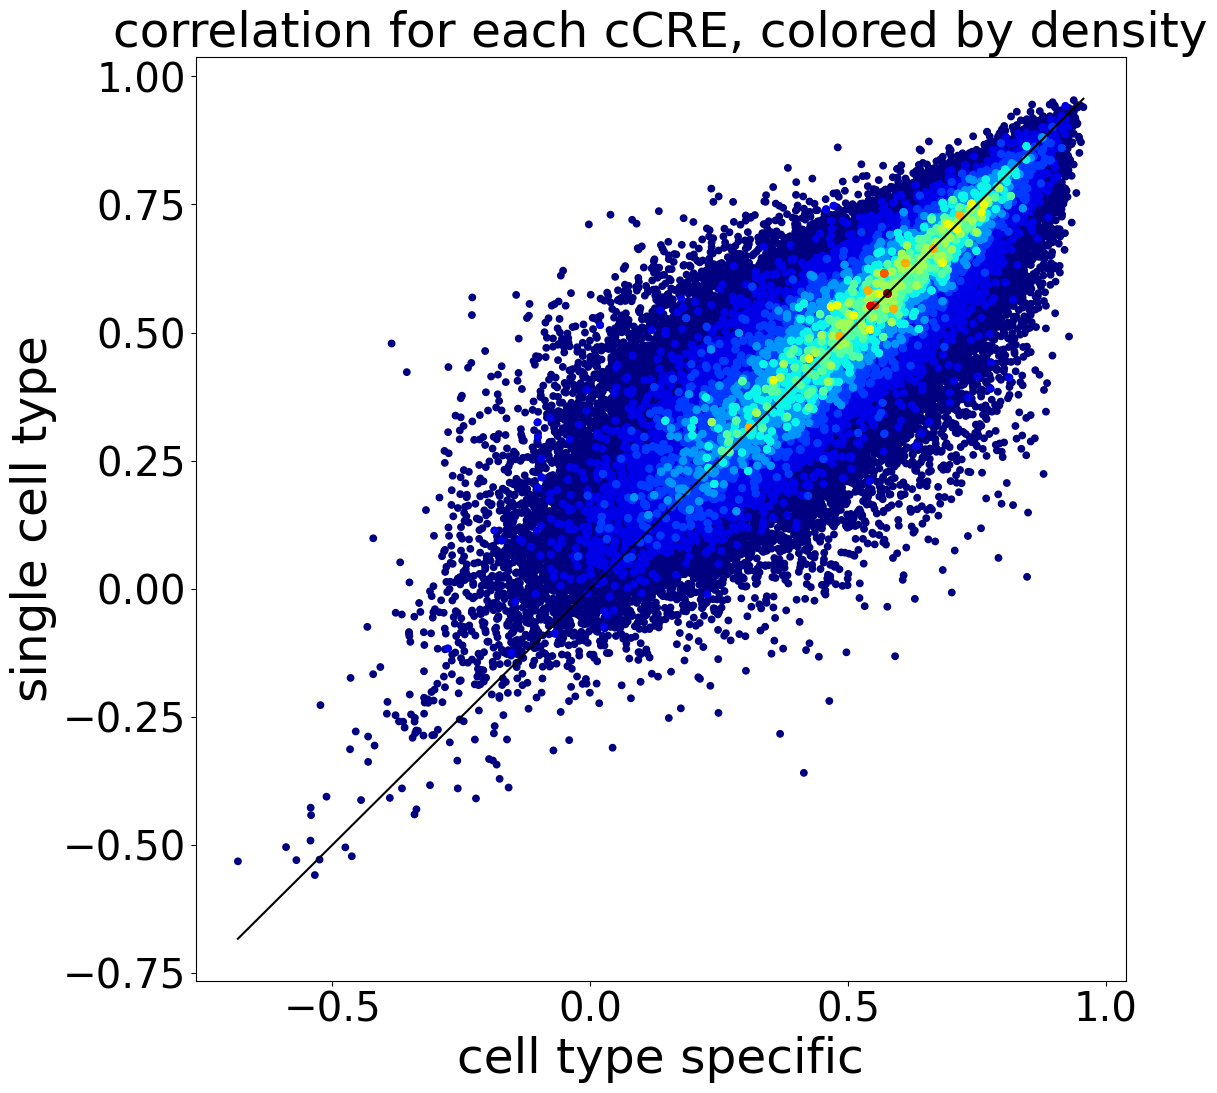

In [10]:
#this seems about right!
import matplotlib.pyplot as plt
x,y = np.array(correlations_ctst), np.array(correlations_sct)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,12)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s = 85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('single cell type', fontsize=35)
plt.title('correlation for each cCRE, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

In [11]:
#and find amount more
x,y = np.array(correlations_ctst), np.array(correlations_sct)
z = x-y
print(np.sum(z>0), np.sum(z<0), np.sum(z==0))
print(np.sum(z>0)/(len(z))) #slightly more on sct models

48342 56910 0
0.4592976855546688


In [12]:
#and let's do for the columns
from scipy.stats import pearsonr
import numpy as np
from tqdm import tqdm
correlations_col_ctst = []
correlations_col_sct = []
mask = t_reg != -10
# correlations_col_mult2 = []
for i in tqdm(range(t_reg.shape[1])):
    # Apply the mask for the current column across all matrices
    current_mask = mask[:, i]
    t_reg_col = t_reg[current_mask, i]
    ctst_pred_class_col = ctst_pred_class[current_mask, i]
    sct_pred_class_col = sct_pred_class[current_mask, i]
    mult2_pred_class_col = mult2_pred_class[current_mask, i]
    corr, _ = pearsonr(t_reg_col, ctst_pred_class_col)
    correlations_col_ctst.append(corr)

    corr, _ = pearsonr(t_reg_col, sct_pred_class_col)
    correlations_col_sct.append(corr)

    # corr, _ = pearsonr(t_reg_col, mult2_pred_class_col)
    # correlations_col_mult2.append(corr)

100%|██████████| 161/161 [00:01<00:00, 86.31it/s]


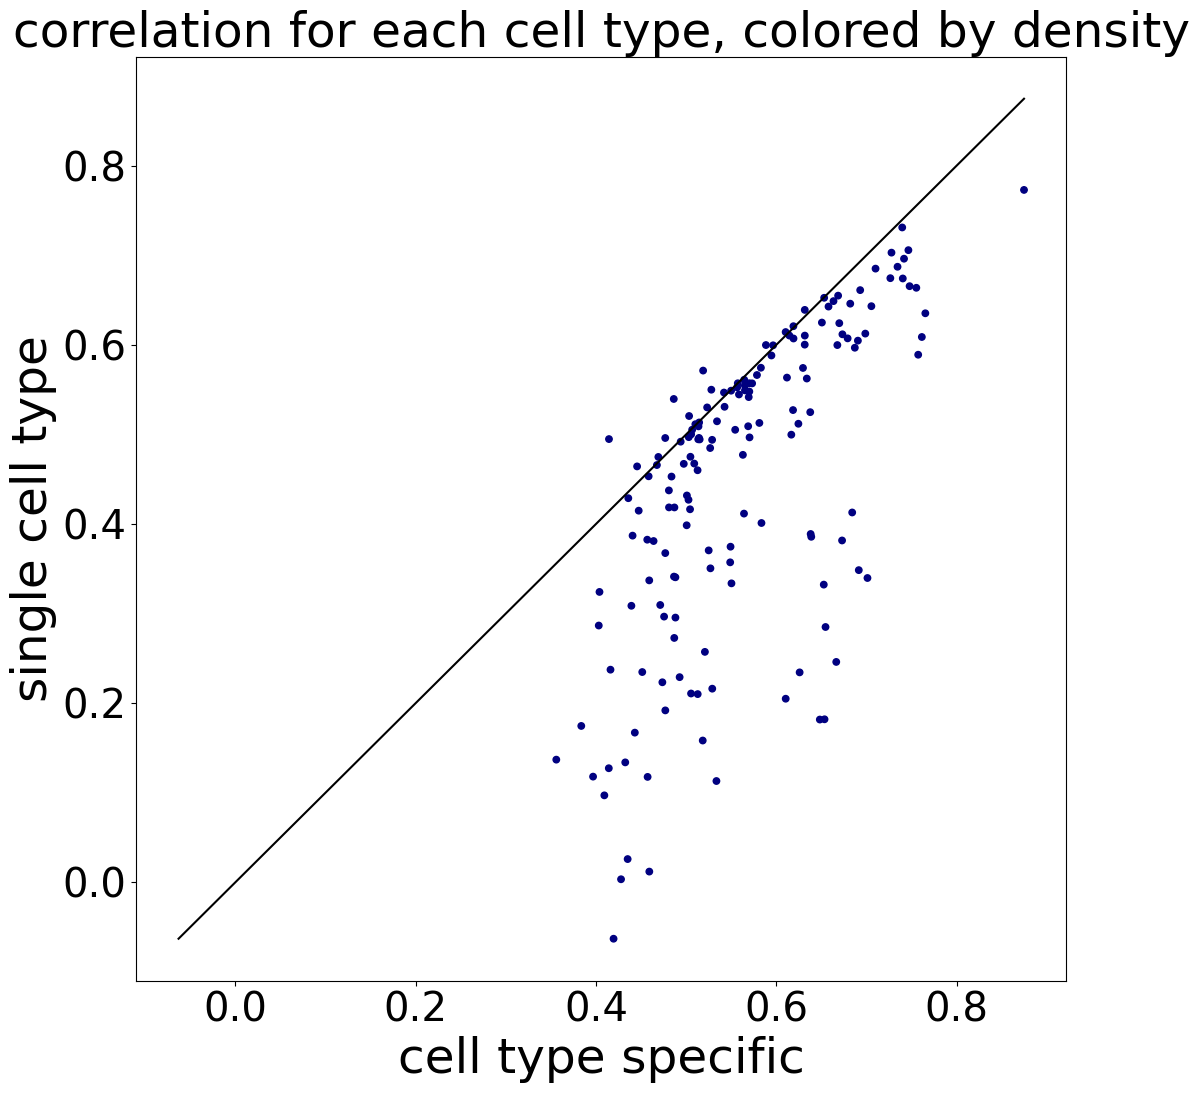

In [15]:
x,y = np.array(correlations_col_ctst), np.array(correlations_col_sct)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,12)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('single cell type', fontsize=35)
plt.title('correlation for each cell type, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

In [16]:
x,y = np.array(correlations_col_ctst), np.array(correlations_col_sct)
z = x-y
print(np.sum(z>0), np.sum(z<0), np.sum(z==0))
print(np.sum(z>0)/(len(z))) #slightly more on ctst model

145 16 0
0.9006211180124224


In [3]:
#we... might have made a huge bug because of copilot, we need reg not class

from scipy.stats import pearsonr
import numpy as np
from tqdm import tqdm
correlations_col_ctst = []
correlations_col_sct = []
mask = t_reg != -10
correlations_col_mult2 = []
for i in tqdm(range(t_reg.shape[1])):
    # Apply the mask for the current column across all matrices
    current_mask = mask[:, i]
    t_reg_col = t_reg[current_mask, i]
    ctst_pred_class_col = ctst_pred_reg[current_mask, i]
    sct_pred_class_col = sct_pred_reg[current_mask, i]
    mult2_pred_class_col = mult2_pred_reg[current_mask, i]
    corr, _ = pearsonr(t_reg_col, ctst_pred_class_col)
    correlations_col_ctst.append(corr)

    corr, _ = pearsonr(t_reg_col, sct_pred_class_col)
    correlations_col_sct.append(corr)

    corr, _ = pearsonr(t_reg_col, mult2_pred_class_col)
    correlations_col_mult2.append(corr)

100%|██████████| 161/161 [00:01<00:00, 81.26it/s]


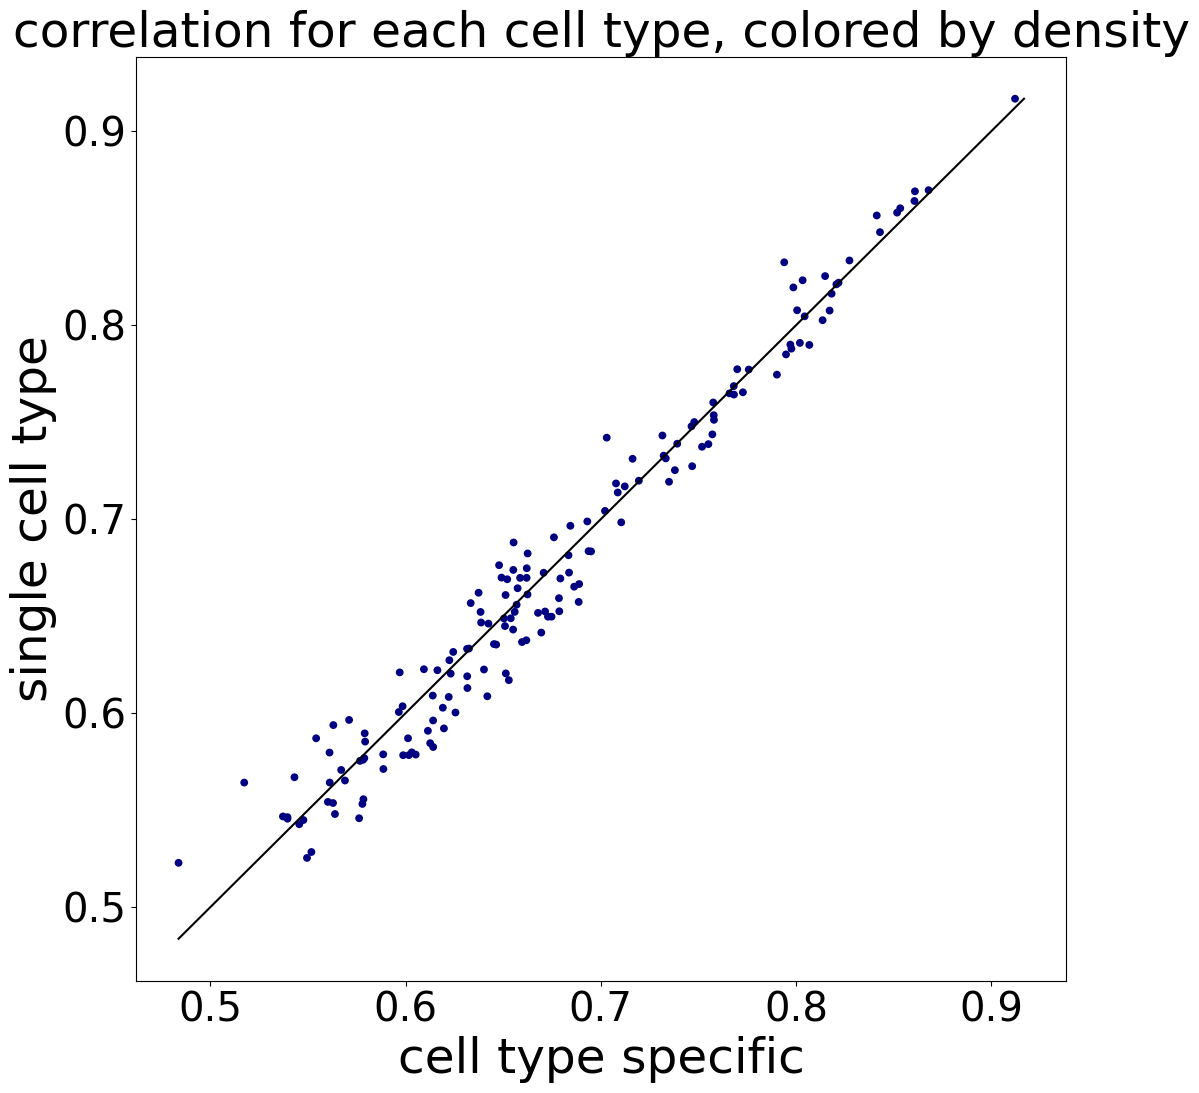

In [18]:
x,y = np.array(correlations_col_ctst), np.array(correlations_col_sct)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,12)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('single cell type', fontsize=35)
plt.title('correlation for each cell type, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

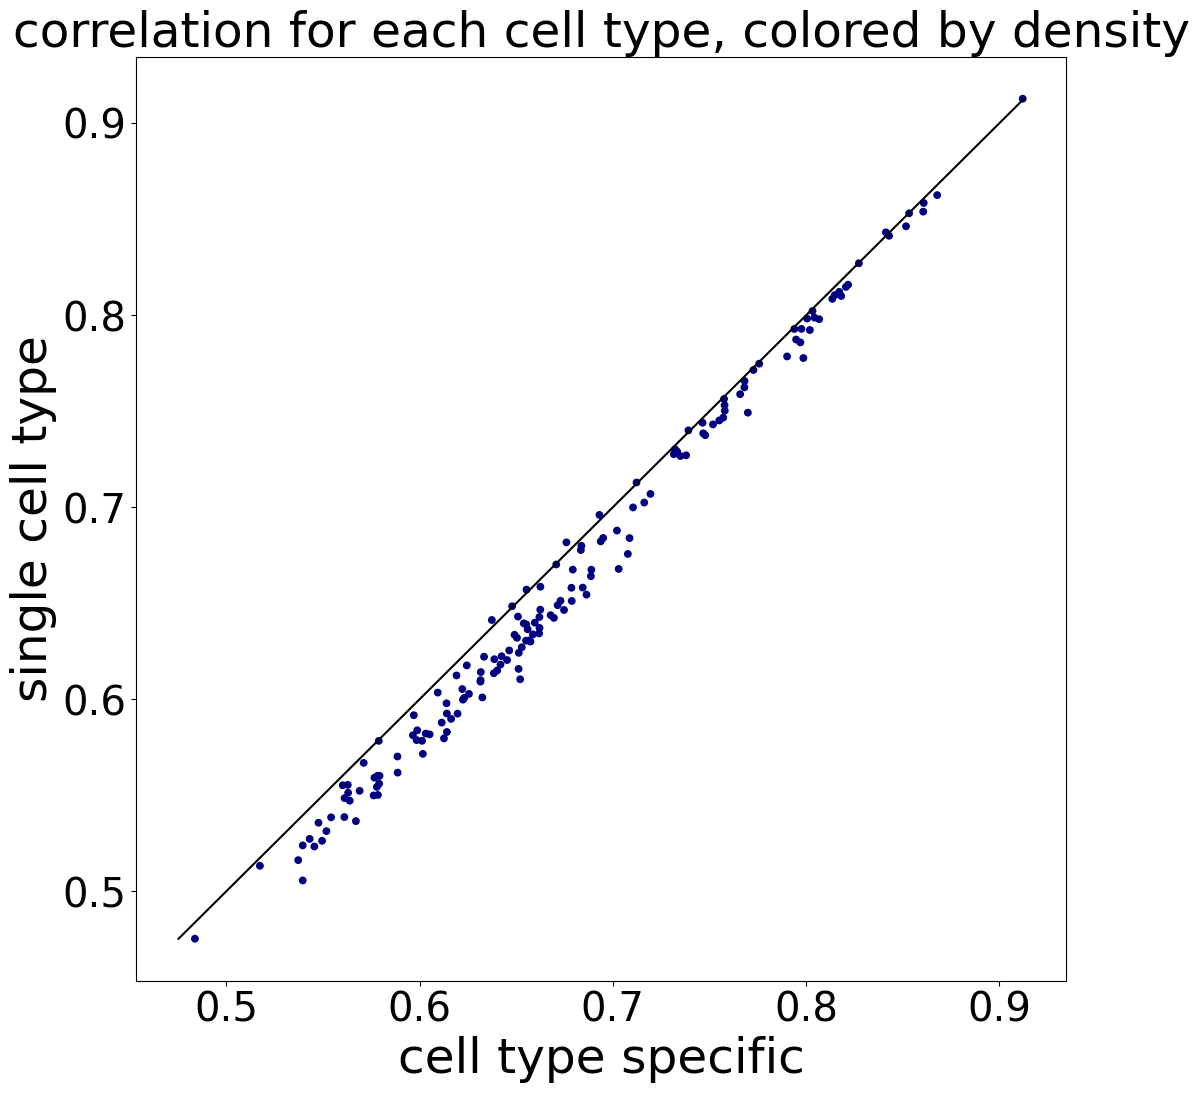

In [19]:
x,y = np.array(correlations_col_ctst), np.array(correlations_col_mult2)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,12)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('single cell type', fontsize=35)
plt.title('correlation for each cell type, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

152 9 0


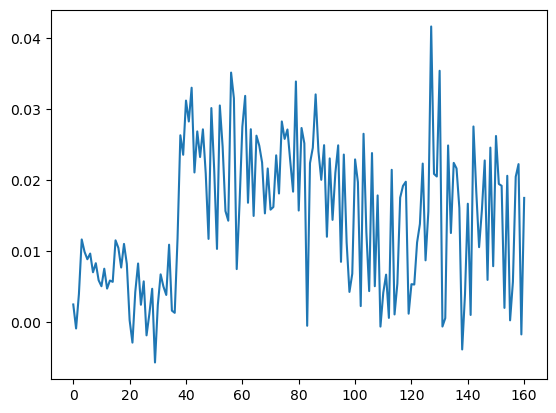

In [7]:
#another thing to compare is without masking
#do pairwise subtraction then plot it
import matplotlib.pyplot as plt
x,y = np.array(correlations_col_ctst), np.array(correlations_col_mult2)
z = x-y
plt.plot(z)
#let's look at the average percent improvemen
print(np.sum(z>0), np.sum(z<0), np.sum(z==0))

0.023878998389484565


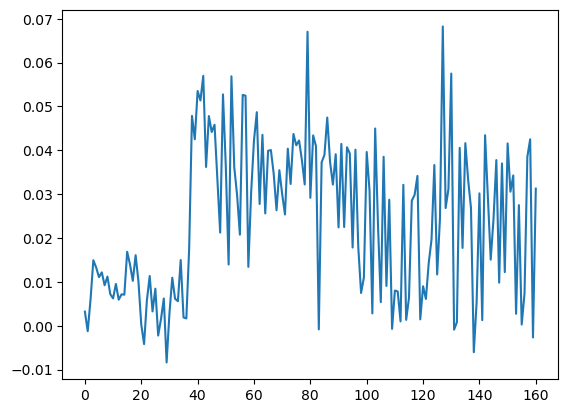

In [9]:
#let's look at the percentage improvement
percent_improve = -(np.array(correlations_col_mult2) - np.array(correlations_col_ctst))/np.array(correlations_col_mult2)
plt.plot(percent_improve)
print(np.mean(percent_improve))

In [41]:
#and let's do for the columns
from scipy.stats import pearsonr
import numpy as np
from tqdm import tqdm
correlations_col_ctst = []
correlations_col_sct = []
# mask = t_reg != -10
correlations_col_mult2 = []
for i in tqdm(range(t_reg.shape[1])):
    # Apply the mask for the current column across all matrices
    # current_mask = mask[:, i]
    t_reg_col = t_reg[:, i]
    ctst_pred_class_col = ctst_pred_reg[:, i]
    sct_pred_class_col = sct_pred_reg[:, i]
    mult2_pred_class_col = mult2_pred_reg[:, i]
    corr, _ = pearsonr(t_reg_col, ctst_pred_class_col)
    correlations_col_ctst.append(corr)

    corr, _ = pearsonr(t_reg_col, sct_pred_class_col)
    correlations_col_sct.append(corr)

    corr, _ = pearsonr(t_reg_col, mult2_pred_class_col)
    correlations_col_mult2.append(corr)

  0%|          | 0/161 [00:00<?, ?it/s]

100%|██████████| 161/161 [00:02<00:00, 65.31it/s]


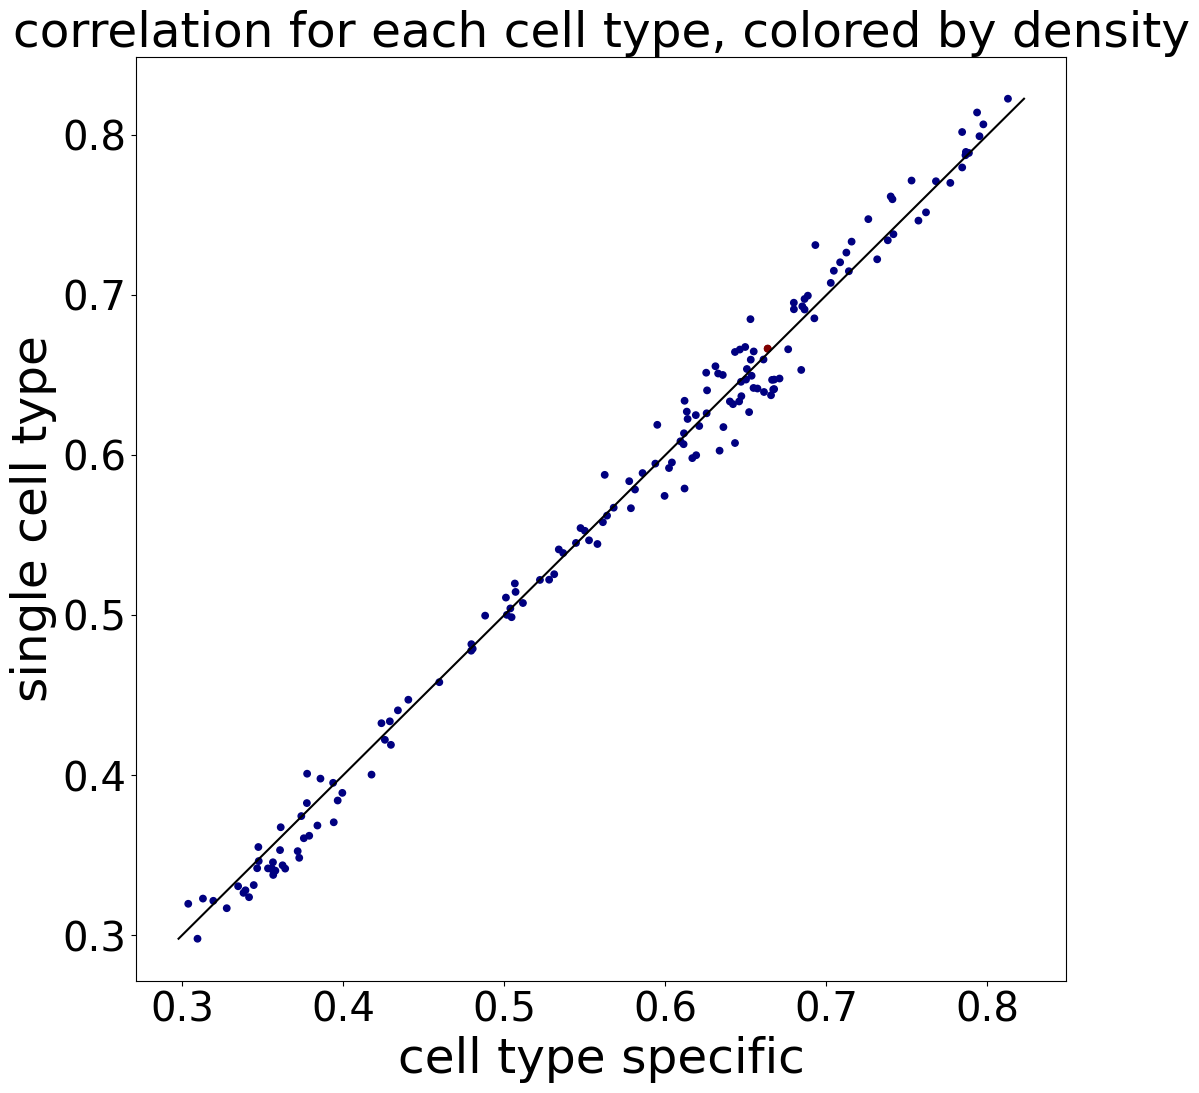

In [42]:
x,y = np.array(correlations_col_ctst), np.array(correlations_col_sct)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,12)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('single cell type', fontsize=35)
plt.title('correlation for each cell type, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

In [43]:
#now find the number that are greater in one over the other
x,y = np.array(correlations_col_ctst), np.array(correlations_col_sct)
z = x-y
print(np.sum(z>0), np.sum(z<0), np.sum(z==0))
#so most of them are still higher there

85 76 0


In [10]:
#print the mean of the residuals
x,y = np.array(correlations_col_ctst), np.array(correlations_col_sct)
z = x-y
print(np.mean(z))

0.002225363396127649


Text(0.5, 1.0, 'correlation for each cell type')

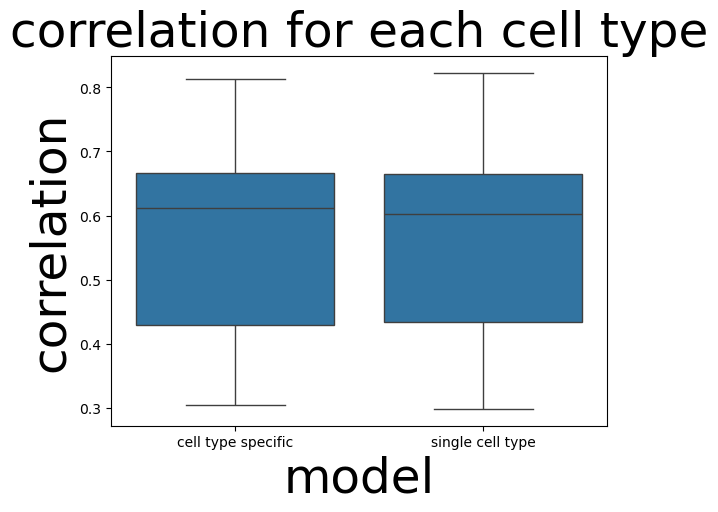

In [44]:
#and do a box plot where we put the mean on the plot
import seaborn as sns

sns.boxplot(x = ['cell type specific']*len(correlations_col_ctst) + ['single cell type']*len(correlations_col_sct), y = correlations_col_ctst + correlations_col_sct)
plt.xlabel('model', fontsize=35)
plt.ylabel('correlation', fontsize=35)
plt.title('correlation for each cell type', fontsize=35)


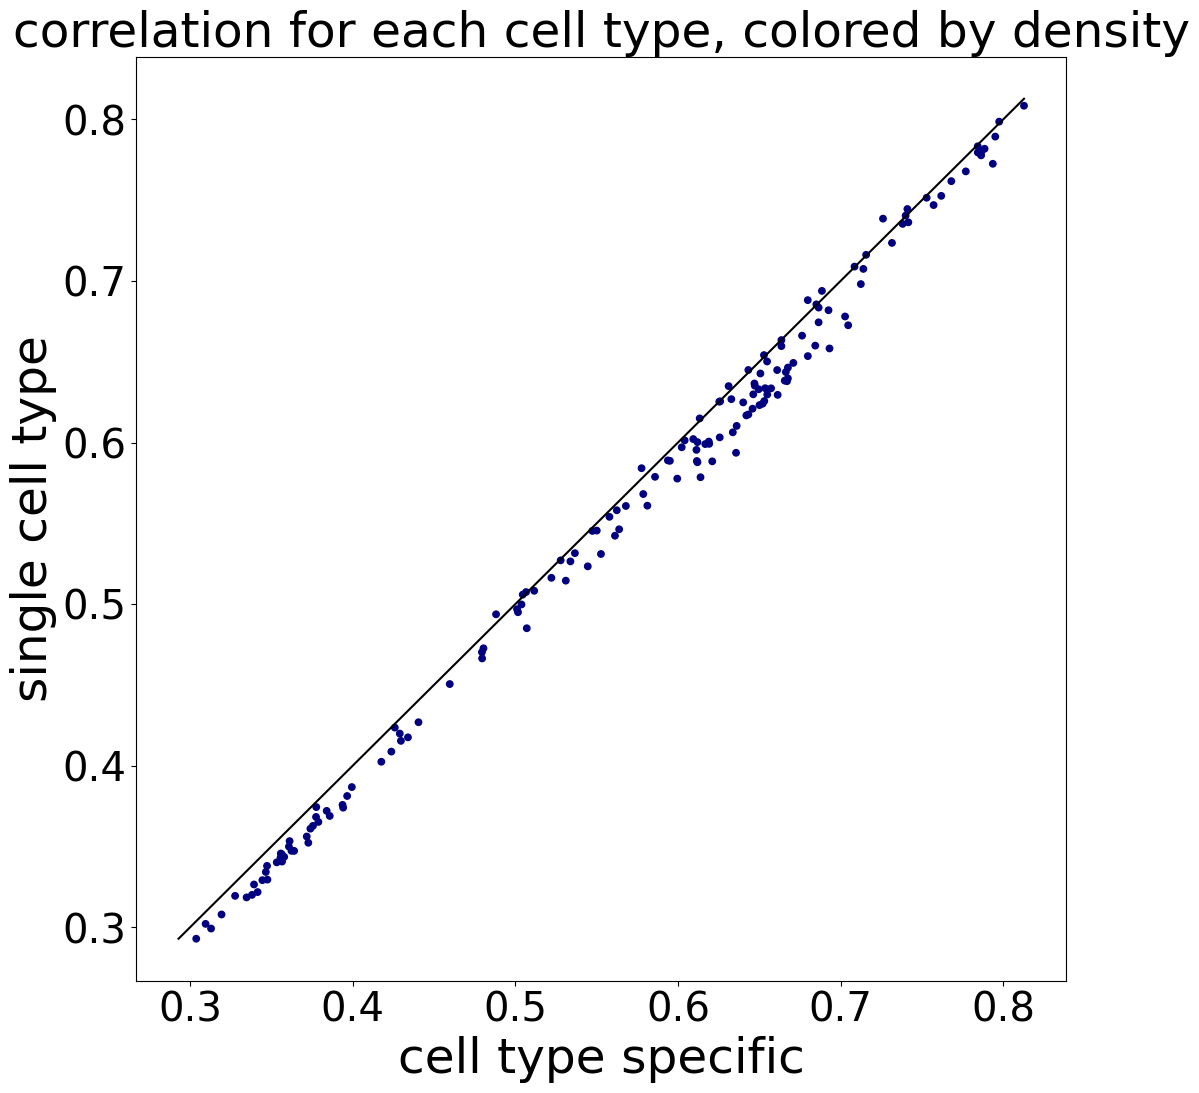

In [27]:
x,y = np.array(correlations_col_ctst), np.array(correlations_col_mult2)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,12)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('single cell type', fontsize=35)
plt.title('correlation for each cell type, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

In [30]:
#conclusions

#doesn't seem to be able to stop feature leakage, is just better at predicting
#but isn't this what matters? Maybe we chalk it up to encode stuff doesn't make sense, try on this immgen dataset to truly see!
#why are the class results so different tho?
#maybe classification is much better? let's do PRC and ROC curves
#let's calculate average precision and roc auc score
from sklearn.metrics import average_precision_score, roc_auc_score
#let's just do it per column
ap_ctst = []
ap_sct = []
ap_mult2 = []
roc_ctst = []
roc_sct = []
roc_mult2 = []
t_class = ctst_target_class
for i in tqdm(range(t_reg.shape[1])):
    t_reg_col = t_class[:, i]
    ctst_pred_class_col = ctst_pred_class[:, i]
    sct_pred_class_col = sct_pred_class[:, i]
    mult2_pred_class_col = mult2_pred_class[:, i]
    ap_ctst.append(average_precision_score(t_reg_col, ctst_pred_class_col))
    ap_sct.append(average_precision_score(t_reg_col, sct_pred_class_col))
    ap_mult2.append(average_precision_score(t_reg_col, mult2_pred_class_col))
    roc_ctst.append(roc_auc_score(t_reg_col, ctst_pred_class_col))
    roc_sct.append(roc_auc_score(t_reg_col, sct_pred_class_col))
    roc_mult2.append(roc_auc_score(t_reg_col, mult2_pred_class_col))

100%|██████████| 161/161 [00:32<00:00,  4.99it/s]


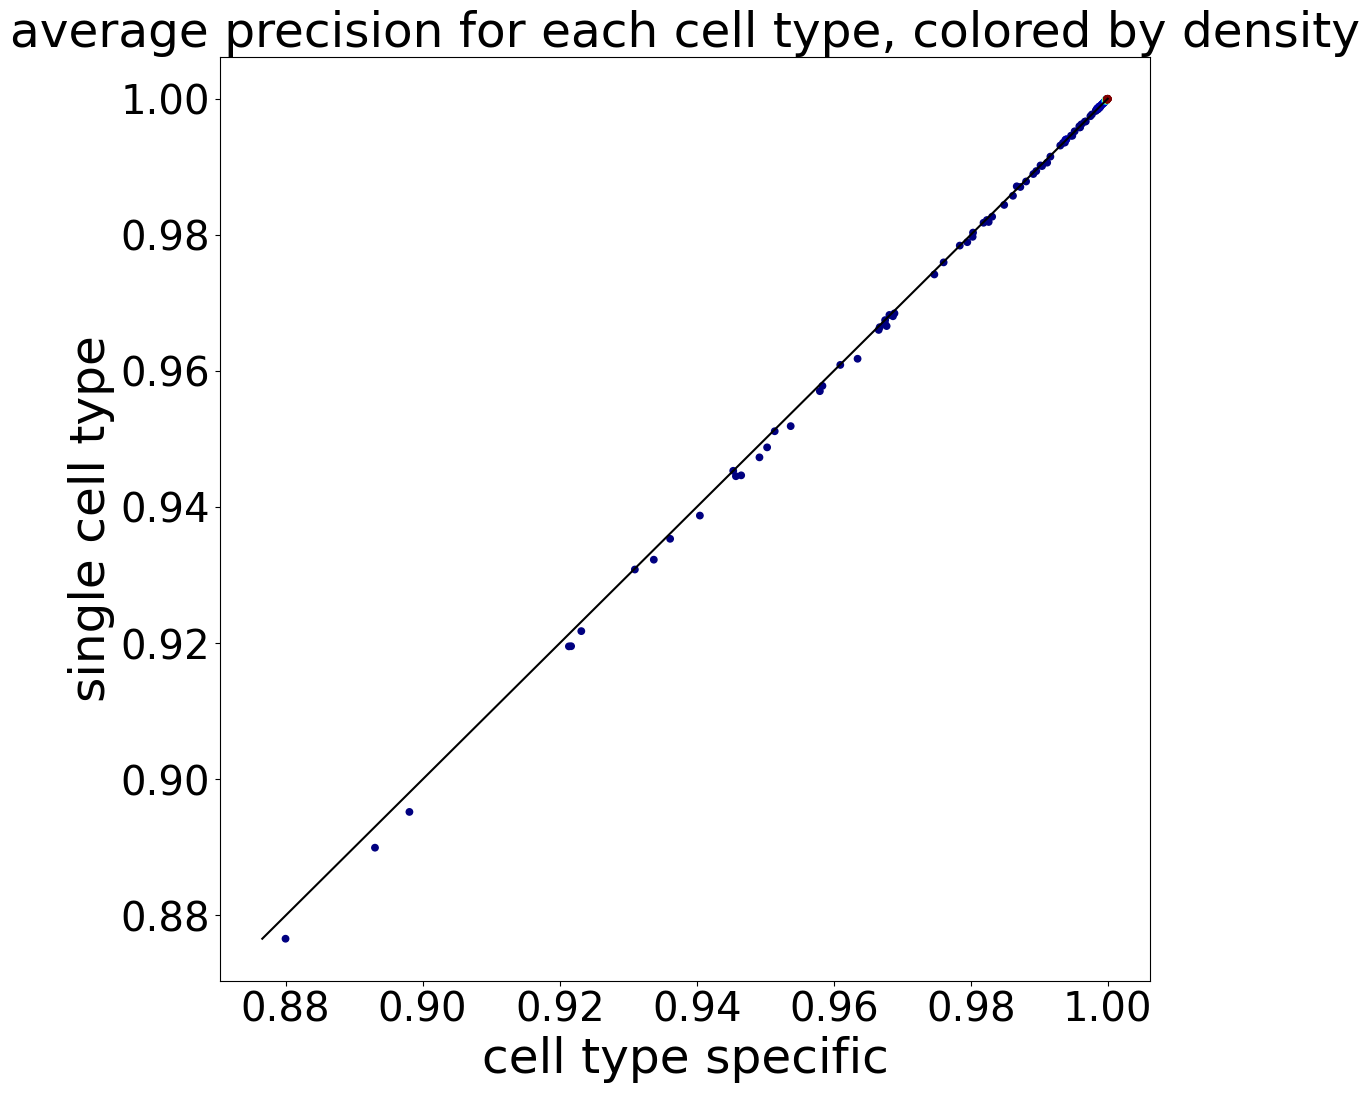

In [33]:
#now do a 2x1 plot where we do ctst vs mul2 and sct vs ctst
x,y = np.array(ap_ctst), np.array(ap_mult2)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,12)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('single cell type', fontsize=35)
plt.title('average precision for each cell type, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

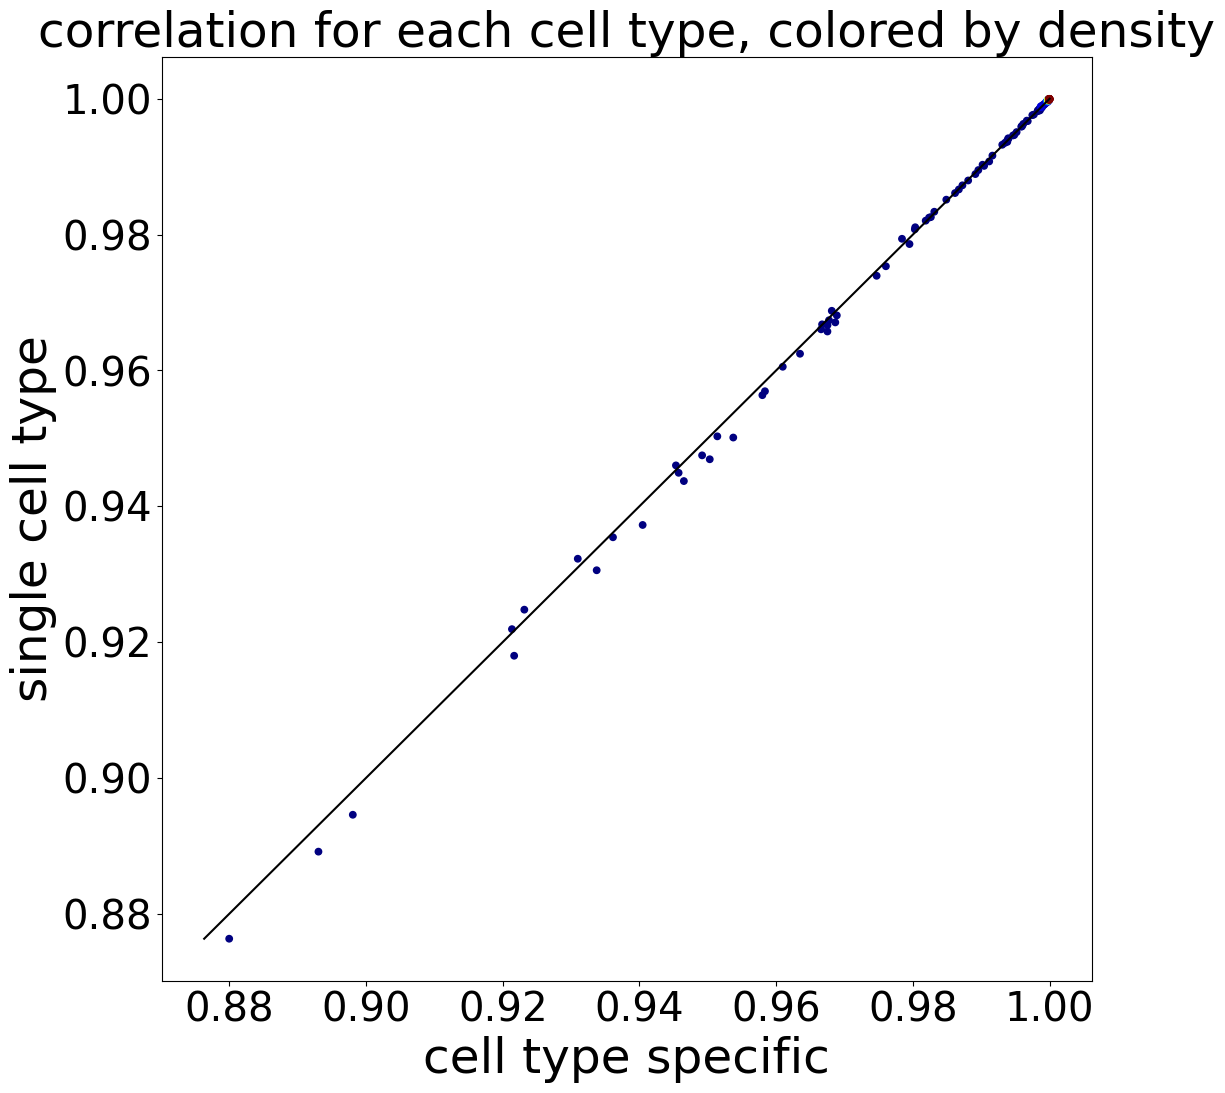

In [32]:
#now do a 2x1 plot where we do ctst vs mul2 and sct vs ctst
x,y = np.array(ap_ctst), np.array(ap_sct)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,12)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('single cell type', fontsize=35)
plt.title('correlation for each cell type, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

In [ ]:
#so not much of a difference here, but somehow the values in just the open regions for classification are much much better, this is a little bit strange, and I can't explain why but it's quite interesting!
#shows that can tell very open vs somewhat open better? But I'm not sure... i don't know what to chalk it up to, it's interesting. This is also only correlations in the open regions, so class can tell more, still interesting!
#so maybe the classification results are less correlated but the regression ones are still heavily correlated? It's kinda hard to tell...
#it does just see less data but that's generally how it's trained anyways. also no true negatives, but true for all our models!

Text(0.5, 1.0, 'multitasking model')

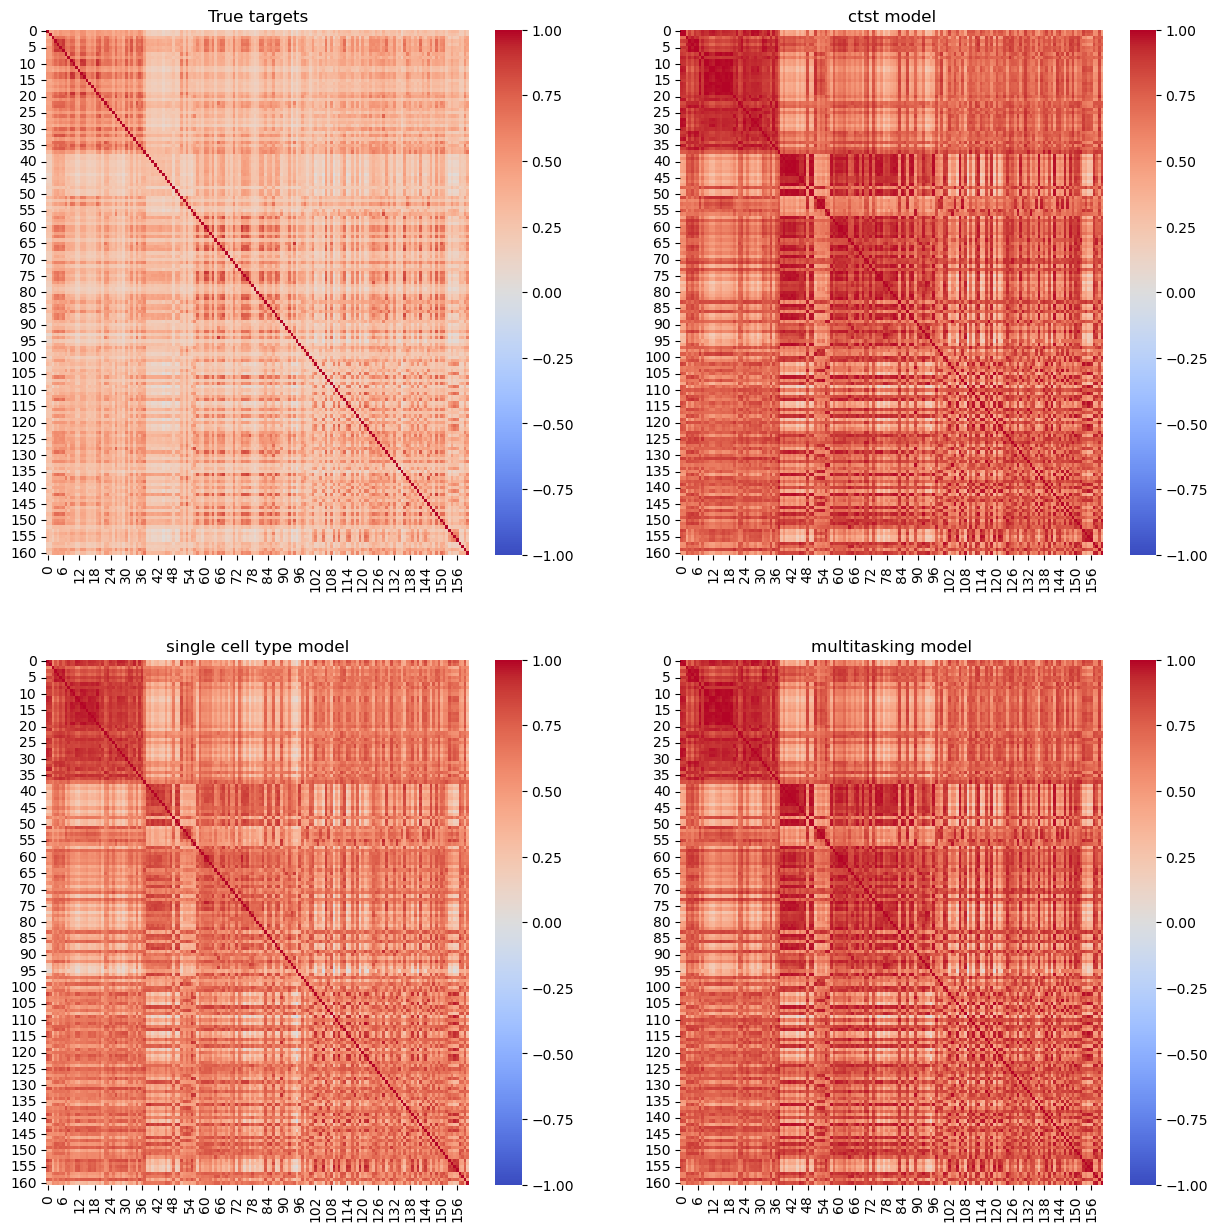

In [37]:
#finally th elast step is to compare how correlated these outputs are from the individual cell type models and the multitasking and the cellt yep specific models!
import seaborn as sns
correlation_matrix_true = np.corrcoef(t_reg.numpy(), rowvar=False)
correlation_matrix_ctst = np.corrcoef(ctst_pred_reg.numpy(), rowvar=False)
correlation_matrix_mult = np.corrcoef(sct_pred_reg.numpy(), rowvar=False)
correlation_matrix_mult2 = np.corrcoef(mult2_pred_reg.numpy(), rowvar=False)

#now plot all 4 in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
sns.heatmap(correlation_matrix_true, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[0, 0])
axs[0, 0].set_title('True targets')
sns.heatmap(correlation_matrix_ctst, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[0, 1])
axs[0, 1].set_title('ctst model')
sns.heatmap(correlation_matrix_mult, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[1, 0])
axs[1, 0].set_title('single cell type model')
sns.heatmap(correlation_matrix_mult2, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[1, 1])
axs[1, 1].set_title('multitasking model')

Text(0.5, 1.0, 'Violin Plot of Upper Triangle Correlation Values')

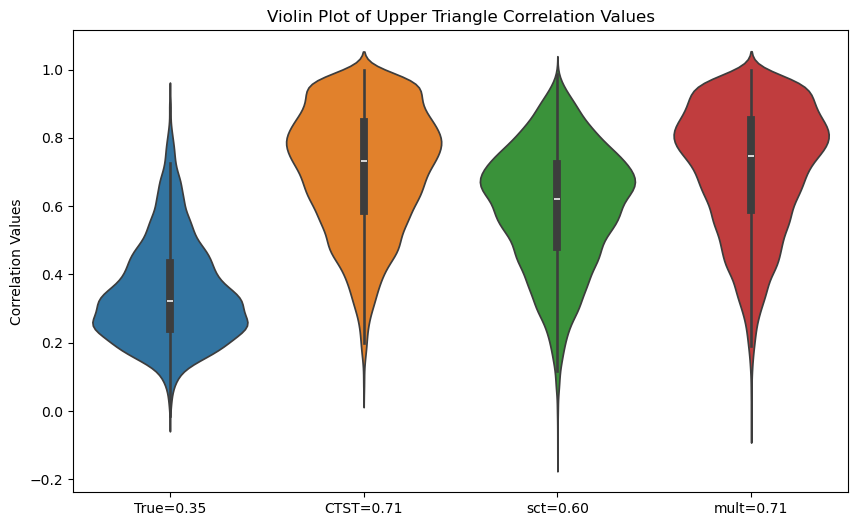

In [40]:
#now we can do a violin plot
def upper_triangle_values(correlation_matrix):
    upper_tri_indices = np.triu_indices_from(correlation_matrix, k=1)
    return correlation_matrix[upper_tri_indices]

# Extracting upper triangle values for each correlation matrix
values_true = upper_triangle_values(correlation_matrix_true)
values_ctst = upper_triangle_values(correlation_matrix_ctst)
values_mult = upper_triangle_values(correlation_matrix_mult)
values_mult2 = upper_triangle_values(correlation_matrix_mult2)

# Prepare data for violin plot
data = [
    values_true,
    values_ctst,
    values_mult,
    values_mult2
]

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data)
# names = [f'True={np.mean(values_true):.2f}', f'CTST={np.mean(values_ctst):.2f}', f'Mult={np.mean(values_mult):.2f}', f'Mult2={np.mean(values_mult2):.2f}']
names = [f'True={np.mean(values_true):.2f}', f'CTST={np.mean(values_ctst):.2f}', f'sct={np.mean(values_mult):.2f}',f'mult={np.mean(values_mult2):.2f}']
plt.xticks([0, 1, 2, 3], names)
plt.ylabel('Correlation Values')
plt.title('Violin Plot of Upper Triangle Correlation Values')

In [ ]:
#the cocnlusion is that it's much less correlated, so maybe our approach doesn't actually solve anything... this is certainly not promising... maybe there's some other way to do it? At least we can use hyena as an alternative architecture

In [ ]:
#let's do one final step of comparing it to the fully trained multitasking model



In [45]:
#now we compare them and load them in, first is make sure the targets are identical, shows we did it right
import torch
ctst_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_reg.pt')
ctst_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_class.pt')
ctst_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_reg.pt')
ctst_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_class.pt')

mult2_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_reg.pt')
mult2_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_reg.pt')
mult2_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_class.pt')
mult2_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_class.pt')

mult_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_targets_reg.pt')
mult_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_predicts_reg.pt')
mult_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_targets_class.pt')
mult_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_predicts_class.pt')

sct_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_targets_reg.pt')
sct_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_predicts_reg.pt')
sct_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_targets_class.pt')
sct_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_predicts_class.pt')

print(ctst_target_reg.shape, ctst_target_class.shape, ctst_pred_reg.shape, ctst_target_class.shape)
#now make sure all the targets are identical for the reg and class
print(torch.all(ctst_target_reg == sct_target_reg))
print(torch.all(ctst_target_class == sct_target_class))
#perfect!
# print(torch.all(ctst_target_class == mult_target_class))
# print(torch.all(mult_target_class == mult2_target_class))
#now set a true targets since only need 1
t_class = ctst_target_class
t_reg = ctst_target_reg
t_reg

torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161])
tensor(True)
tensor(True)


tensor([[-10.0000,  -0.4581, -10.0000,  ..., -10.0000,  -1.7576, -10.0000],
        [-10.0000,  -1.1888, -10.0000,  ..., -10.0000,  -3.0268,  -2.2397],
        [  0.2071,   1.3613,  -2.4325,  ...,  -0.7399,   4.2481,  -0.7007],
        ...,
        [  0.9784,   0.6225,   0.2469,  ...,   0.3363,   0.6615,  -0.4536],
        [  1.4823,   1.6966,   0.2309,  ...,   0.2233,   0.8615,  -0.2049],
        [  0.8997,   0.8567,   0.4843,  ...,   0.1876,   0.8940,  -1.0668]])

In [46]:
#now we need to mask out the values
mask = t_reg != -10
mask

tensor([[False,  True, False,  ..., False,  True, False],
        [False,  True, False,  ..., False,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        ...,
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True]])

In [47]:
t_reg[0,mask[0,:]].shape #only 89! that's what we expect, now do this analysis and find correlations

torch.Size([72])

In [50]:
#and let's do for the columns
from scipy.stats import pearsonr
import numpy as np
from tqdm import tqdm
correlations_col_ctst = []
correlations_col_sct = []
correlations_col_mult = []
mask = t_reg != -10
# correlations_col_mult2 = []
for i in tqdm(range(t_reg.shape[1])):
    # Apply the mask for the current column across all matrices
    current_mask = mask[:, i]
    t_reg_col = t_reg[current_mask, i]
    ctst_pred_class_col = ctst_pred_reg[current_mask, i]
    sct_pred_class_col = sct_pred_reg[current_mask, i]
    mult_pred_class_col = mult_pred_reg[current_mask, i]
    corr, _ = pearsonr(t_reg_col, ctst_pred_class_col)
    correlations_col_ctst.append(corr)

    corr, _ = pearsonr(t_reg_col, sct_pred_class_col)
    correlations_col_sct.append(corr)

    corr, _ = pearsonr(t_reg_col, mult_pred_class_col)
    correlations_col_mult.append(corr)

100%|██████████| 161/161 [00:01<00:00, 105.97it/s]


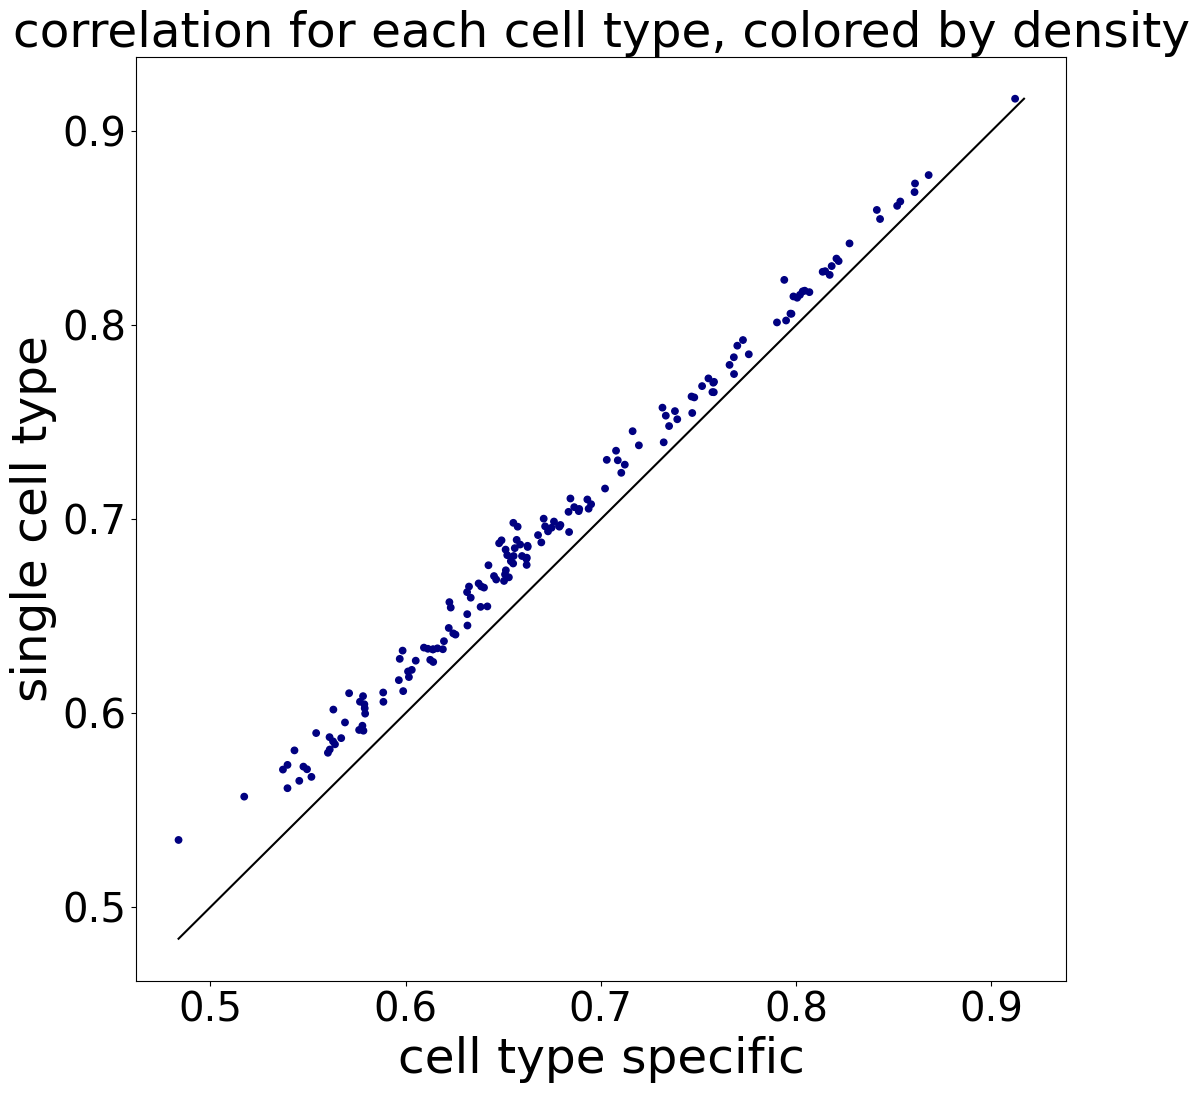

In [51]:
x,y = np.array(correlations_col_ctst), np.array(correlations_col_mult)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,12)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('single cell type', fontsize=35)
plt.title('correlation for each cell type, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

In [ ]:
#eh, perhaps it's just learning more? It's definitely hard to tell... but the conclusion I think is that it's not fundamentally better... we'll see let' sjust hold off judgement until we look at chrombpnet and immgen...

In [1]:
#final thing we will do is proper evaluation of the classification
import torch
ctst_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_reg.pt')
ctst_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_class.pt')
ctst_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_reg.pt')
ctst_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_class.pt')

mult2_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_reg.pt')
mult2_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_reg.pt')
mult2_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_class.pt')
mult2_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_class.pt')

mult_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_targets_reg.pt')
mult_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_predicts_reg.pt')
mult_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_targets_class.pt')
mult_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_predicts_class.pt')

sct_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_targets_reg.pt')
sct_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_predicts_reg.pt')
sct_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_targets_class.pt')
sct_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_predicts_class.pt')

print(ctst_target_reg.shape, ctst_target_class.shape, ctst_pred_reg.shape, ctst_target_class.shape)
#now make sure all the targets are identical for the reg and class
print(torch.all(ctst_target_reg == sct_target_reg))
print(torch.all(ctst_target_class == sct_target_class))
#perfect!
# print(torch.all(ctst_target_class == mult_target_class))
# print(torch.all(mult_target_class == mult2_target_class))
#now set a true targets since only need 1
t_class = ctst_target_class
t_reg = ctst_target_reg
t_reg

torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161])
tensor(True)
tensor(True)


tensor([[-10.0000,  -0.4581, -10.0000,  ..., -10.0000,  -1.7576, -10.0000],
        [-10.0000,  -1.1888, -10.0000,  ..., -10.0000,  -3.0268,  -2.2397],
        [  0.2071,   1.3613,  -2.4325,  ...,  -0.7399,   4.2481,  -0.7007],
        ...,
        [  0.9784,   0.6225,   0.2469,  ...,   0.3363,   0.6615,  -0.4536],
        [  1.4823,   1.6966,   0.2309,  ...,   0.2233,   0.8615,  -0.2049],
        [  0.8997,   0.8567,   0.4843,  ...,   0.1876,   0.8940,  -1.0668]])

In [2]:
#now we need to mask out the values
mask = t_reg != -10
mask

tensor([[False,  True, False,  ..., False,  True, False],
        [False,  True, False,  ..., False,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        ...,
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True]])

In [3]:
t_reg[0,mask[0,:]].shape #only 89! that's what we expect, now do this analysis and find correlations

torch.Size([72])

In [7]:
#conclusions

#doesn't seem to be able to stop feature leakage, is just better at predicting
#but isn't this what matters? Maybe we chalk it up to encode stuff doesn't make sense, try on this immgen dataset to truly see!
#why are the class results so different tho?
#maybe classification is much better? let's do PRC and ROC curves
#let's calculate average precision and roc auc score
from sklearn.metrics import average_precision_score, roc_auc_score
#let's just do it per column
ap_ctst = []
ap_sct = []
ap_mult2 = []
roc_ctst = []
roc_sct = []
roc_mult2 = []
t_class = ctst_target_class
for i in tqdm(range(t_reg.shape[1])):
    t_reg_col = t_class[:, i]
    ctst_pred_class_col = ctst_pred_class[:, i]
    sct_pred_class_col = sct_pred_class[:, i]
    mult2_pred_class_col = mult2_pred_class[:, i]
    ap_ctst.append(average_precision_score(t_reg_col, 1-torch.sigmoid(ctst_pred_class_col), pos_label=0))
    ap_sct.append(average_precision_score(t_reg_col, 1-torch.sigmoid(sct_pred_class_col), pos_label=0))
    ap_mult2.append(average_precision_score(t_reg_col, 1-torch.sigmoid(mult2_pred_class_col), pos_label=0))

100%|██████████| 161/161 [00:20<00:00,  7.77it/s]


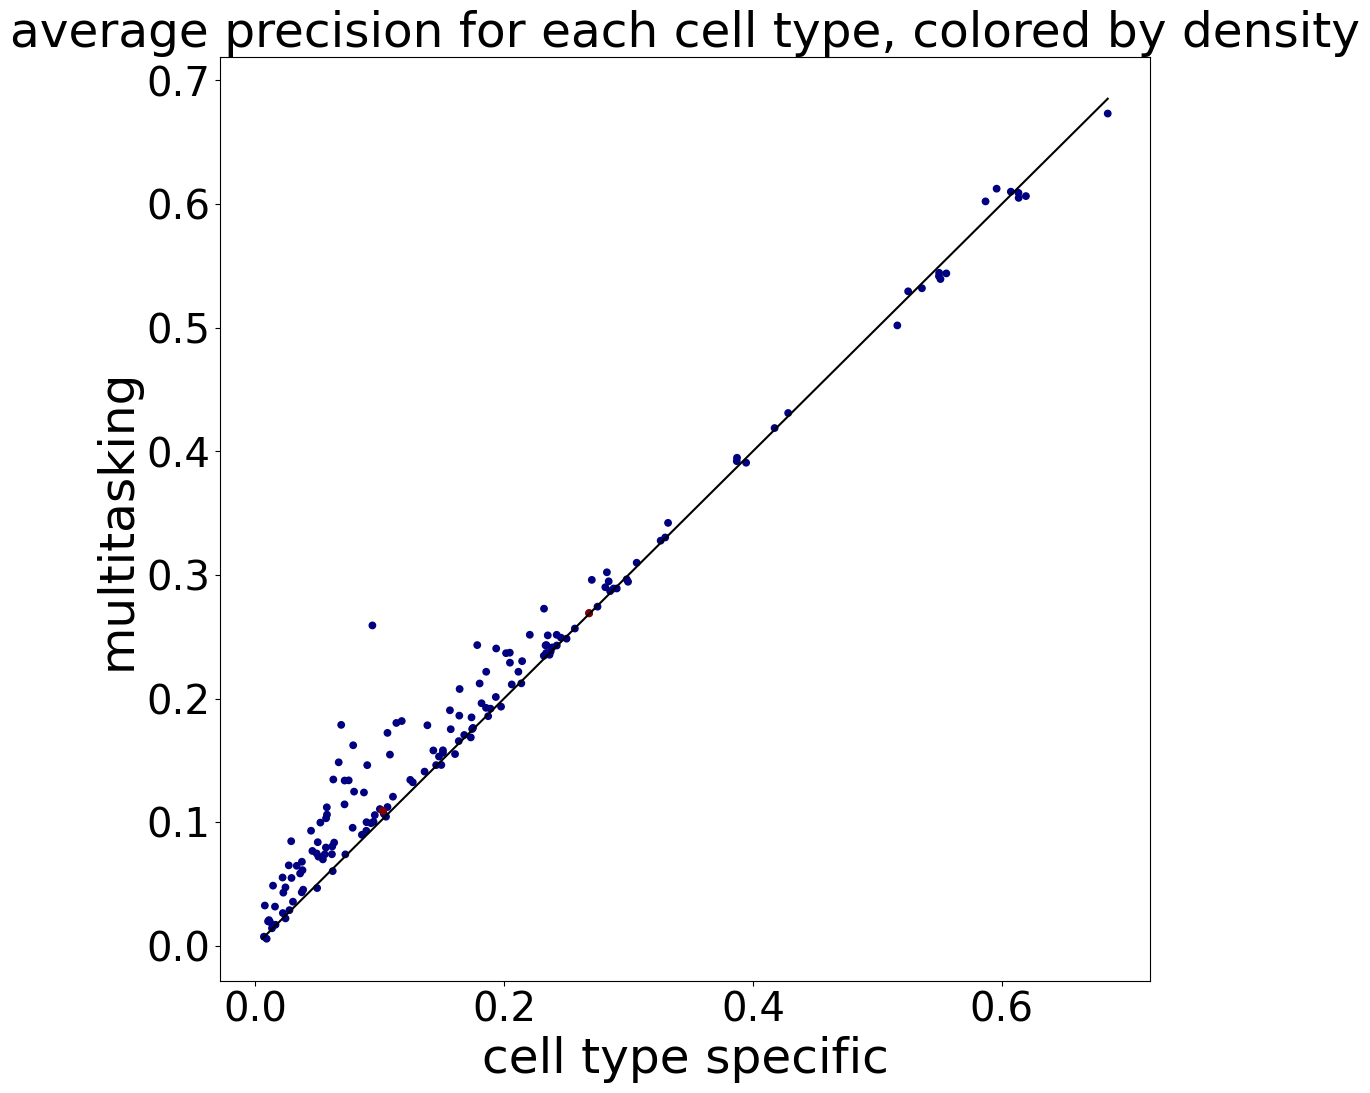

In [10]:
#now do a 2x1 plot where we do ctst vs mul2 and sct vs ctst
import matplotlib.pyplot as plt
x,y = np.array(ap_ctst), np.array(ap_mult2)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,12)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('multitasking', fontsize=35)
plt.title('average precision for each cell type, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

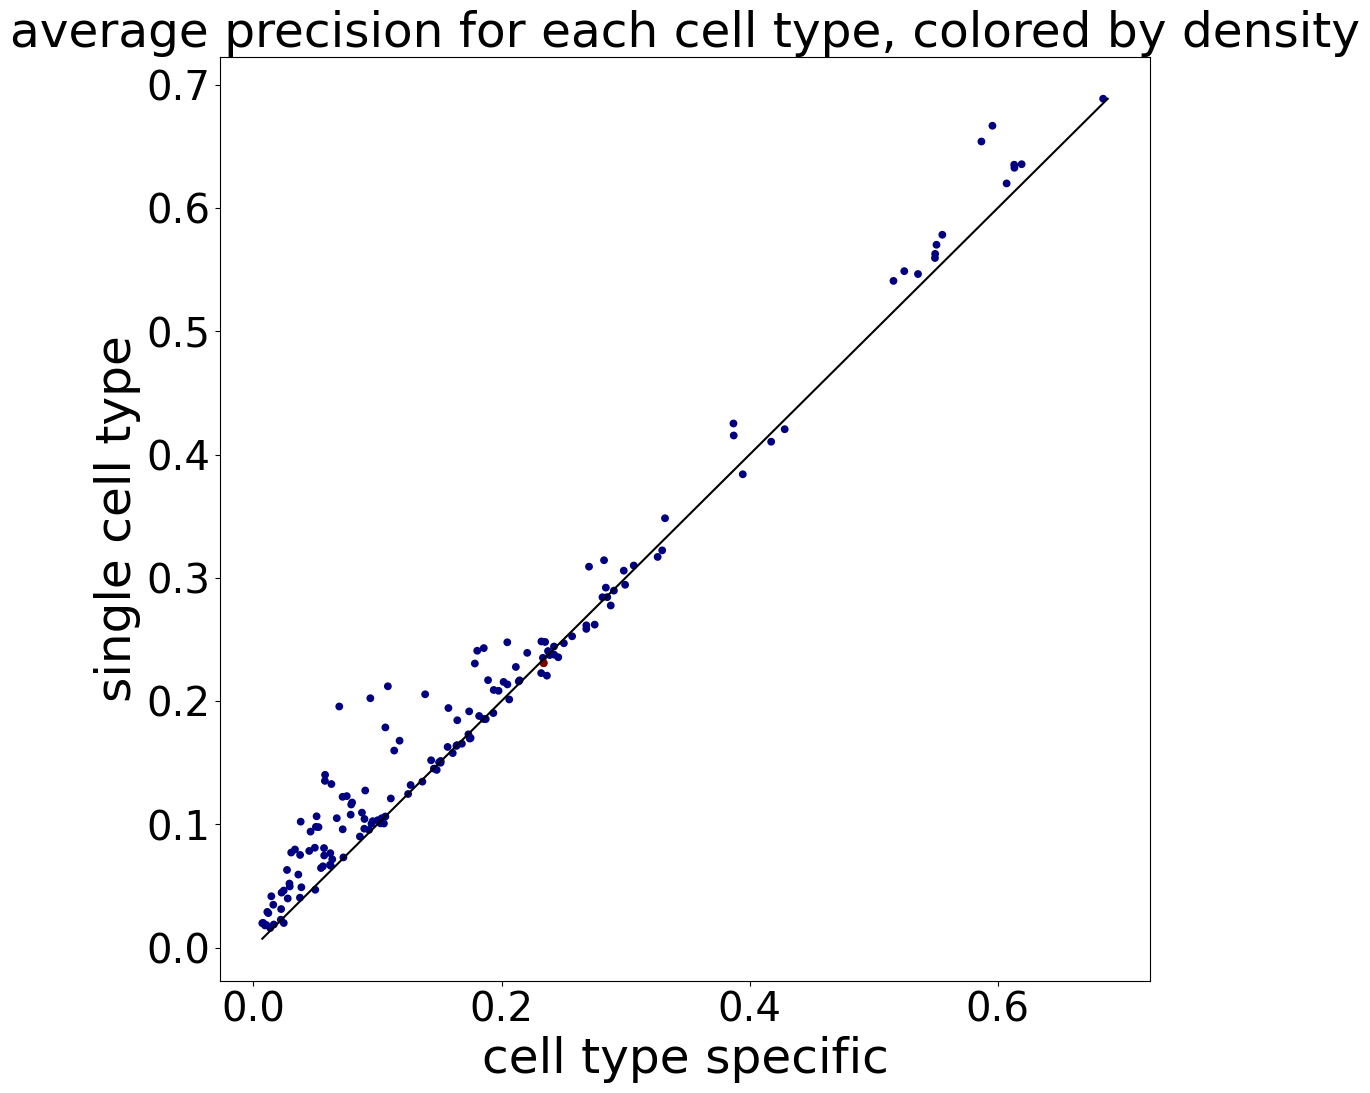

In [15]:
#now do a 2x1 plot where we do ctst vs mul2 and sct vs ctst
import matplotlib.pyplot as plt
x,y = np.array(ap_ctst), np.array(ap_sct)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,12)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('single cell type', fontsize=35)
plt.title('average precision for each cell type, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

# finally let's go ahead and compare the classification things

In [1]:
#we will compare how correlated classification is pairwise, so 161 points, can compare the models
#final thing we will do is proper evaluation of the classification
import torch
ctst_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_reg.pt')
ctst_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_class.pt')
ctst_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_reg.pt')
ctst_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_class.pt')

mult2_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_reg.pt')
mult2_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_reg.pt')
mult2_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_class.pt')
mult2_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_class.pt')

mult_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_targets_reg.pt')
mult_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_predicts_reg.pt')
mult_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_targets_class.pt')
mult_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_predicts_class.pt')

sct_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_targets_reg.pt')
sct_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_predicts_reg.pt')
sct_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_targets_class.pt')
sct_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/sct_bestepoch_predicts_class.pt')

print(ctst_target_reg.shape, ctst_target_class.shape, ctst_pred_reg.shape, ctst_target_class.shape)
#now make sure all the targets are identical for the reg and class
print(torch.all(ctst_target_reg == sct_target_reg))
print(torch.all(ctst_target_class == sct_target_class))
#perfect!
# print(torch.all(ctst_target_class == mult_target_class))
# print(torch.all(mult_target_class == mult2_target_class))
#now set a true targets since only need 1
t_class = ctst_target_class
t_reg = ctst_target_reg
t_reg

torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161])
tensor(True)
tensor(True)


tensor([[-10.0000,  -0.4581, -10.0000,  ..., -10.0000,  -1.7576, -10.0000],
        [-10.0000,  -1.1888, -10.0000,  ..., -10.0000,  -3.0268,  -2.2397],
        [  0.2071,   1.3613,  -2.4325,  ...,  -0.7399,   4.2481,  -0.7007],
        ...,
        [  0.9784,   0.6225,   0.2469,  ...,   0.3363,   0.6615,  -0.4536],
        [  1.4823,   1.6966,   0.2309,  ...,   0.2233,   0.8615,  -0.2049],
        [  0.8997,   0.8567,   0.4843,  ...,   0.1876,   0.8940,  -1.0668]])

In [2]:
#now we need to mask out the values
mask = t_reg != -10
mask

tensor([[False,  True, False,  ..., False,  True, False],
        [False,  True, False,  ..., False,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        ...,
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True]])

In [4]:
#now let's do the pairwise comparison
from scipy.stats import pearsonr
import numpy as np
from tqdm import tqdm

correlations_col_ctst = []
correlations_col_sct = []
correlations_col_mult2 = []

for i in tqdm(range(t_reg.shape[1])):
    # Apply the mask for the current column across all matrices
    current_mask = mask[:, i]
    t_reg_col = t_class[current_mask, i]
    ctst_pred_class_col = ctst_pred_class[current_mask, i]
    sct_pred_class_col = sct_pred_class[current_mask, i]
    mult2_pred_class_col = mult2_pred_class[current_mask, i]
    ctst_pred_reg_col = ctst_pred_reg[current_mask, i]
    sct_pred_reg_col = sct_pred_reg[current_mask, i]
    mult2_pred_reg_col = mult2_pred_reg[current_mask, i]
    corr, _ = pearsonr(ctst_pred_reg_col, ctst_pred_class_col)
    correlations_col_ctst.append(corr)

    corr, _ = pearsonr(sct_pred_reg_col, sct_pred_class_col)
    correlations_col_sct.append(corr)

    corr, _ = pearsonr(mult2_pred_reg_col, mult2_pred_class_col)
    correlations_col_mult2.append(corr)

  0%|          | 0/161 [00:00<?, ?it/s]

100%|██████████| 161/161 [00:02<00:00, 69.25it/s]


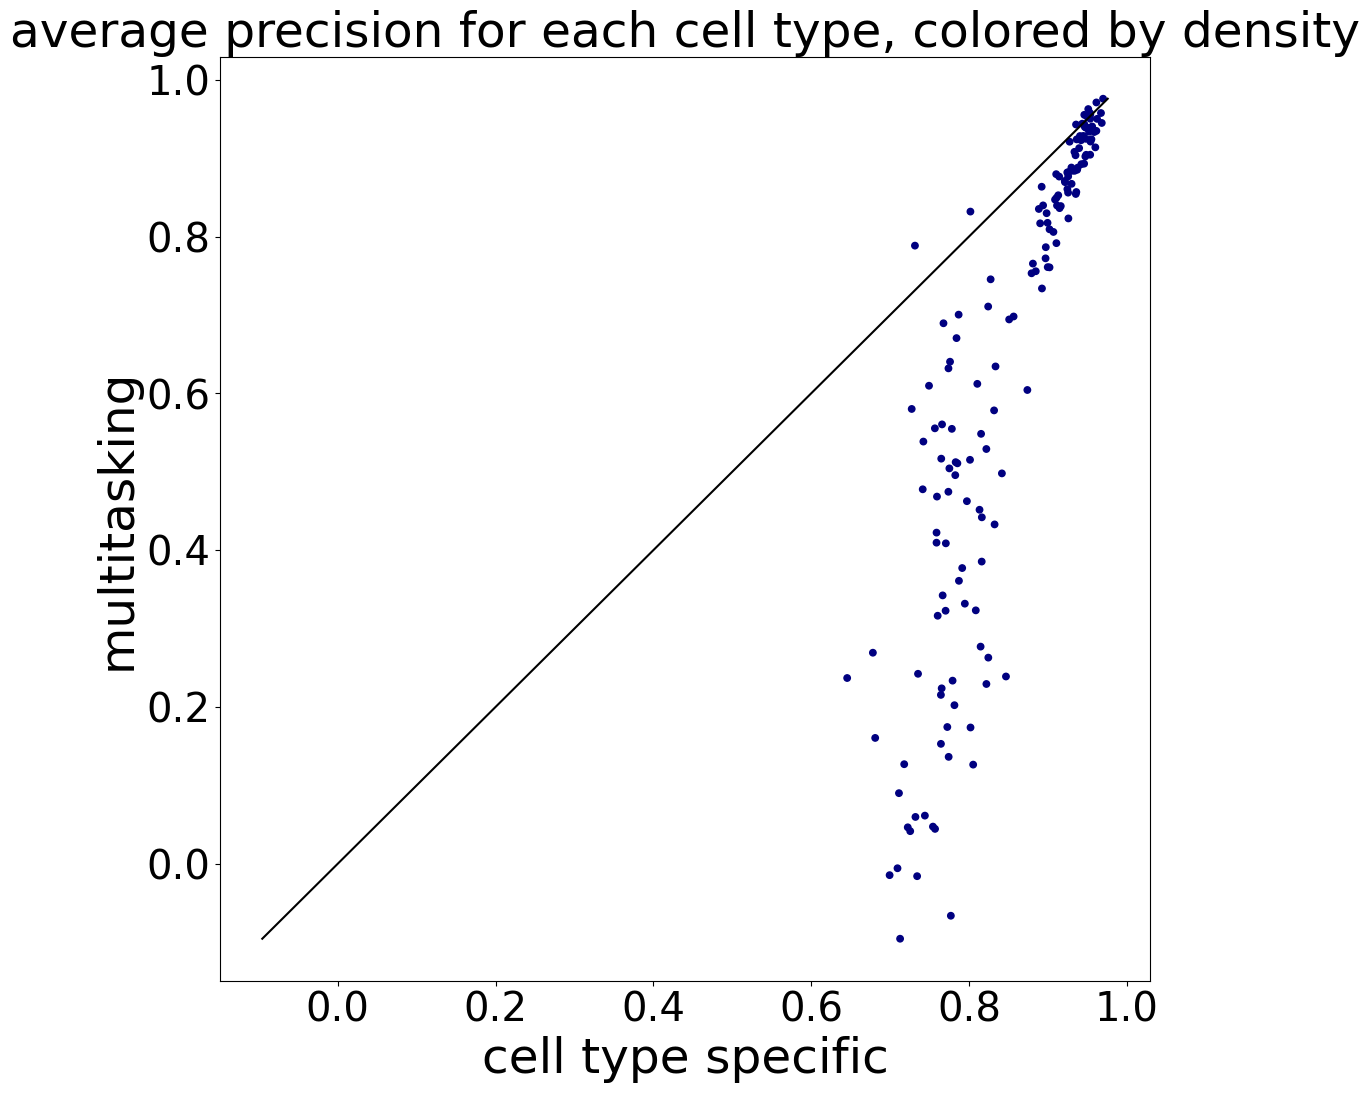

In [5]:
#and now plot

import matplotlib.pyplot as plt
x,y = np.array(correlations_col_ctst), np.array(correlations_col_mult2)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,12)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('multitasking', fontsize=35)
plt.title('average precision for each cell type, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

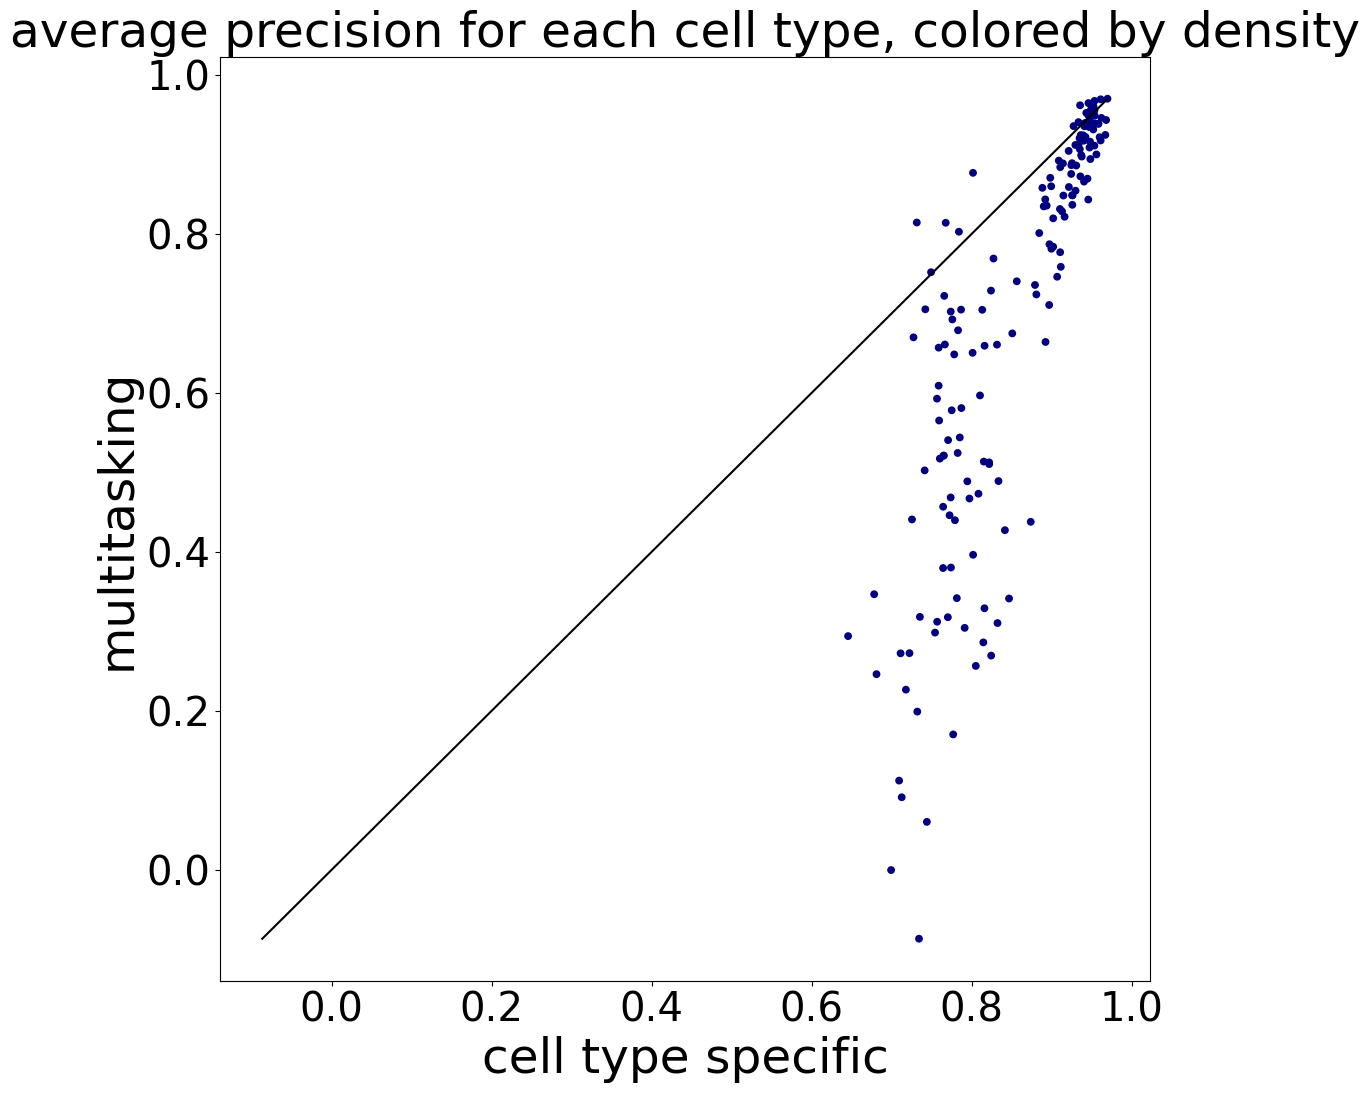

In [6]:
#and now plot

import matplotlib.pyplot as plt
x,y = np.array(correlations_col_ctst), np.array(correlations_col_sct)
bins = [1000, 1000] # number of bins

# histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

tempmin = np.min([np.min(x), np.min(y)])
tempmax = np.max([np.max(x), np.max(y)])

plt.figure(1,figsize=(12,12)).clf()
s = plt.scatter(x2, y2, c=z2, cmap='jet', marker='.', s=85)
plt.plot([tempmin, tempmax], [tempmin, tempmax], c='k')  
# plt.colorbar()
plt.xlabel('cell type specific', fontsize=35)
plt.ylabel('multitasking', fontsize=35)
plt.title('average precision for each cell type, colored by density', fontsize=35)
plt.tick_params(labelsize=29)

Text(0.5, 1.0, 'multitasking model')

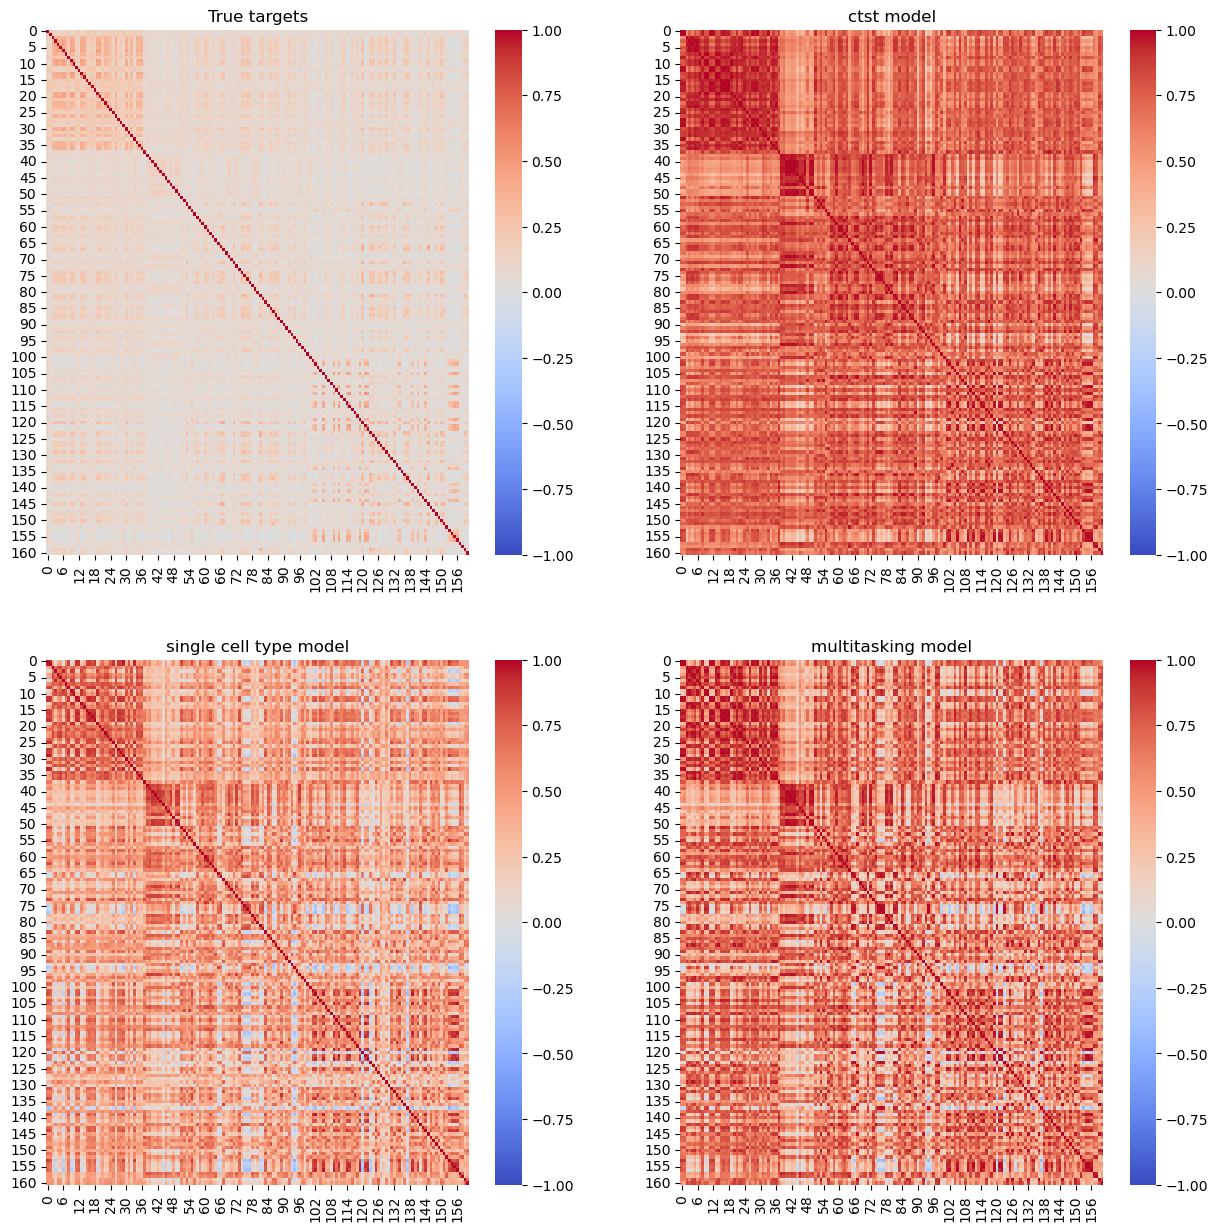

In [7]:
#so the primary issue seems to be feature leakage between the classification and regression tasks which isn't terrible but... let's see how correlated the classification is without masking
import seaborn as sns
correlation_matrix_true = np.corrcoef(t_class.numpy(), rowvar=False)
correlation_matrix_ctst = np.corrcoef(ctst_pred_class.numpy(), rowvar=False)
correlation_matrix_mult = np.corrcoef(sct_pred_class.numpy(), rowvar=False)
correlation_matrix_mult2 = np.corrcoef(mult2_pred_class.numpy(), rowvar=False)


#now plot all 4 in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
sns.heatmap(correlation_matrix_true, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[0, 0])
axs[0, 0].set_title('True targets')
sns.heatmap(correlation_matrix_ctst, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[0, 1])
axs[0, 1].set_title('ctst model')
sns.heatmap(correlation_matrix_mult, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[1, 0])
axs[1, 0].set_title('single cell type model')
sns.heatmap(correlation_matrix_mult2, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[1, 1])
axs[1, 1].set_title('multitasking model')

Text(0.5, 1.0, 'Violin Plot of Upper Triangle Correlation Values')

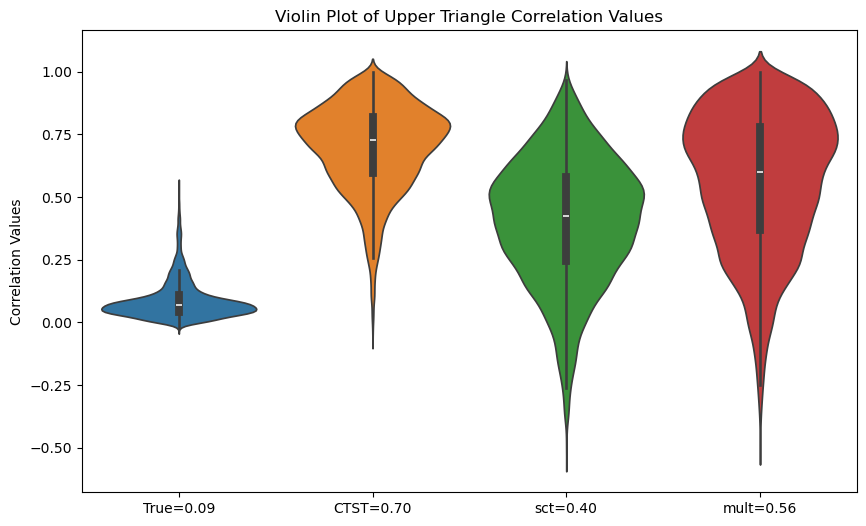

In [8]:
#now we can do a violin plot
def upper_triangle_values(correlation_matrix):
    upper_tri_indices = np.triu_indices_from(correlation_matrix, k=1)
    return correlation_matrix[upper_tri_indices]

# Extracting upper triangle values for each correlation matrix
values_true = upper_triangle_values(correlation_matrix_true)
values_ctst = upper_triangle_values(correlation_matrix_ctst)
values_mult = upper_triangle_values(correlation_matrix_mult)
values_mult2 = upper_triangle_values(correlation_matrix_mult2)

# Prepare data for violin plot
data = [
    values_true,
    values_ctst,
    values_mult,
    values_mult2
]

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data)
# names = [f'True={np.mean(values_true):.2f}', f'CTST={np.mean(values_ctst):.2f}', f'Mult={np.mean(values_mult):.2f}', f'Mult2={np.mean(values_mult2):.2f}']
names = [f'True={np.mean(values_true):.2f}', f'CTST={np.mean(values_ctst):.2f}', f'sct={np.mean(values_mult):.2f}',f'mult={np.mean(values_mult2):.2f}']
plt.xticks([0, 1, 2, 3], names)
plt.ylabel('Correlation Values')
plt.title('Violin Plot of Upper Triangle Correlation Values')

In [ ]:
#this shows a few things, there is actuallyf eature leakage with this, so we shouldn't looka t this dataset, maybe a potential idea, but here it didn't work properly...
